In [1]:
 pip install zellij

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: joblib>=0.11 in c:\users\djouad\anaconda3\lib\site-packages (from scikit-learn->gpytorch>=1.6.0->zellij) (1.1.0)



In [5]:
from zellij.core.geometry import Hypersphere
from zellij.strategies import DBA, ILS, PHS
from zellij.strategies.tools.tree_search import Move_up
from zellij.strategies.tools.scoring import Distance_to_the_best_corrected
import numpy as np
from zellij.core import ContinuousSearchspace, FloatVar, ArrayVar, Loss

# Define the function you want to optimize
def my_function(x):
    return np.sum(np.square(x))

# Define the number of dimensions
dim = 5

# Create the search space with continuous variables
values = ArrayVar(*[FloatVar(f"x{i}", -10, 10) for i in range(dim)])

# Define the loss function
loss = Loss(my_function)

# Define the number of function evaluations
calls = 5000 * dim
def FDA_al(values, loss, calls, o = np.array([-1.0, 1.0]), f_bias = 0,verbose=True, inflation=1.75, level=5  ):
  sp = Hypersphere(
      values,
      loss,
      inflation=inflation,
      heuristic=Distance_to_the_best_corrected(),
  )

  phs = PHS(sp, 3, verbose=verbose)
  ils = ILS(sp, 25, verbose=verbose)

  dba = DBA(
      sp,
      calls,
      Move_up(sp, level),
      exploration=phs,
      exploitation=ils,
      verbose=verbose,
      inflation=inflation,
  )
  dba.run()

  return sp

# Run the FDA algorithm

sp = FDA_al(values, loss, calls)
best = (sp.loss.best_point, sp.loss.best_score)
print(f"Best solution found:f({best[0]})={best[1]}")
# Get the best solution found
best_solution = sp.loss.best_point
best_score = sp.loss.best_score

# Print the result
print(f"Best solution found: f({best_solution}) = {best_score}")


Best solution found:f([1.4718625761429693, 0.0, 0.0, 0.0, 0.0])=2.1663794430502183
Best solution found: f([1.4718625761429693, 0.0, 0.0, 0.0, 0.0]) = 2.1663794430502183


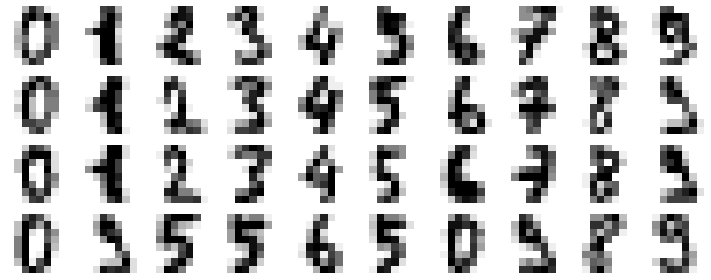

Accuracy: 0.9861111111111112


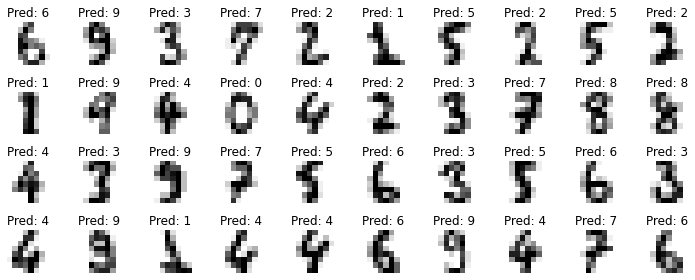

Best solution found:f([2.746802771714976, -2.903534040963943])=-64.19561235905536


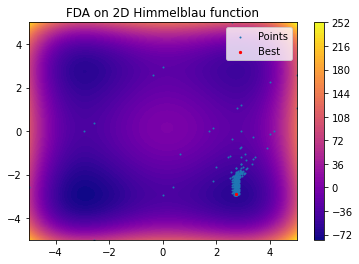

In [2]:
from zellij.core.geometry import Hypersphere
from zellij.strategies import DBA, ILS, PHS
from zellij.strategies.tools.tree_search import Move_up
from zellij.strategies.tools.scoring import Distance_to_the_best_corrected

from zellij.core import ContinuousSearchspace, FloatVar, ArrayVar, Loss
from zellij.utils.benchmarks import himmelblau

loss = Loss()(himmelblau)
values = ArrayVar(
                  FloatVar("a",-5,5),
                  FloatVar("b",-5,5)
                  )

def FDA_al(
  values, loss, calls, verbose=True, inflation=1.75, level=5
  ):
  sp = Hypersphere(
      values,
      loss,
      inflation=inflation,
      heuristic=Distance_to_the_best_corrected(),
  )

  phs = PHS(sp, 3, verbose=verbose)
  ils = ILS(sp, 5000000, verbose=verbose)

  dba = DBA(
      sp,
      calls,
      Move_up(sp, level),
      exploration=phs,
      exploitation=ils,
      verbose=verbose,
      inflation=inflation,
  )
  dba.run()

  return sp

sp = FDA_al(values, loss, 1000)
best = (sp.loss.best_point, sp.loss.best_score)
print(f"Best solution found:f({best[0]})={best[1]}")

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
x = y = np.linspace(-5, 5, 100)
X,Y = np.meshgrid(x,y)
Z = (X**4-16*X**2+5*X + Y**4-16*Y**2+5*Y)/2

map = ax.contourf(X,Y,Z,cmap="plasma", levels=100)
fig.colorbar(map)
ax.scatter(
            np.array(sp.loss.all_solutions)[:,0],
            np.array(sp.loss.all_solutions)[:,1],
            s=1,
            label="Points"
          )
ax.scatter(
            best[0][0],
            best[0][1],
            c="red",
            s=5,
            label="Best"
          )
ax.set_title("FDA on 2D Himmelblau function")
ax.legend()
plt.show()

In [5]:
from zellij.core.geometry import Hypersphere
from zellij.strategies import DBA, ILS, PHS
from zellij.strategies.tools.tree_search import Move_up
from zellij.strategies.tools.scoring import Distance_to_the_best_corrected
import numpy as np
from zellij.core import ContinuousSearchspace, FloatVar, ArrayVar, Loss 
from zellij.utils.benchmarks import himmelblau ,Rosenbrock ,Schaffer ,Schwefel_problem ,Sphere ,Modified_schwefel 
'''FDA algorithm whith Zellij '''
def FDA_al(values, loss, calls, o = np.array([-1.0, 1.0]), f_bias = 0,verbose=True, inflation=1.75, level=5  ):
  sp = Hypersphere(
      values,
      loss,
      inflation=inflation,
      heuristic=Distance_to_the_best_corrected(),
  )

  phs = PHS(sp, 3, verbose=verbose)
  ils = ILS(sp, 25, verbose=verbose)

  dba = DBA(
      sp,
      calls,
      Move_up(sp, level),
      exploration=phs,
      exploitation=ils,
      verbose=verbose,
      inflation=inflation,
  )
  dba.run()

  return sp



Best solution found:f([0.9217895131981146, 0.7493500861670853])=0.016186163932575146


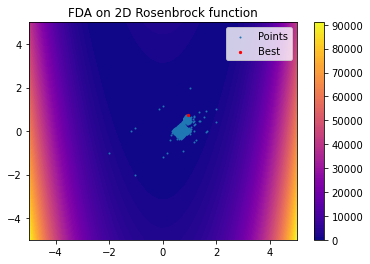

In [6]:

'''                                                              rosenbrock function (fda)                                               '''
@Loss(save=False, verbose=True)
def rosenbrock(x):
       return (1-x[0])**2+(x[1]-x[0]**2)**2
loss = Loss()(rosenbrock)
   
values = ArrayVar(
                  FloatVar("a",-2,2),
                  FloatVar("b",-2,2)
                  )



sp = FDA_al(values, rosenbrock, 2000)
best = (sp.loss.best_point, sp.loss.best_score)
print(f"Best solution found:f({best[0]})={best[1]}")

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
x = y = np.linspace(-5, 5, 100)
X,Y = np.meshgrid(x,y)
#Z = (X**4-16*X**2+5*X + Y**4-16*Y**2+5*Y)/2
Z = (1 - X)**2 + 100 * (Y - X**2)**2

map = ax.contourf(X,Y,Z,cmap="plasma", levels=100)
fig.colorbar(map)
ax.scatter(
            np.array(sp.loss.all_solutions)[:,0],
            np.array(sp.loss.all_solutions)[:,1],
            s=1,
            label="Points"
          )
ax.scatter(
            best[0][0],
            best[0][1],
            c="red",
            s=5,
            label="Best"
          )
ax.set_title("FDA on 2D Rosenbrock function")
ax.legend()
plt.show()

In [13]:
'''shifted_sphere_function'''
def shifted_sphere_function(x, o):
    z = x - o
    return np.sum(z**2)



# f2
def Schwefel_Problem(dim, x):

    F = abs(x[0] - SCHWEFEL_SHIFT[0])
    for i in range(1, dim):
        z = x[i] - SCHWEFEL_SHIFT[i]
        F = max(F, abs(z))

    return F
@Loss(save=False, verbose=True)
def F2(x):
    dim = 100
    return Schwefel_Problem(dim, x)

In [ ]:
import numpy as np
'''                                                      FDA on shifted_schwefel_221                                                        '''

DIM = 100
values = ArrayVar(*[FloatVar(f"x{i}", -5, 5) for i in range(DIM)])
sp = FDA_al(values, F2, 500000,level=5)
best = (sp.loss.best_point, sp.loss.best_score)
print(f"Best solution found: f({best[0]}) = {best[1]}")


In [9]:
from zellij.core.geometry import Hypersphere
from zellij.strategies import DBA, ILS, PHS
from zellij.strategies.tools.tree_search import Move_up
from zellij.strategies.tools.scoring import Distance_to_the_best_corrected
import numpy as np
from zellij.core import ContinuousSearchspace, FloatVar, ArrayVar, Loss
from zellij.utils.benchmarks import himmelblau, Rosenbrock, Schaffer, Schwefel_problem, Sphere, Modified_schwefel

def F3(x, o, f_bias=0):
    z = [xi - oi for xi, oi in zip(x, o)]
    D = len(z)
    sum_val = 0
    for i in range(D - 1):
        sum_val += 100 * ((z[i] ** 2 - z[i + 1]) ** 2) + ((z[i] - 12) ** 2)
    return sum_val + f_bias

def FDA_al(values, loss, calls, o=np.array([-1.0, 1.0]), f_bias=0, verbose=True, inflation=1.75, level=5):
    sp = Hypersphere(
        values,
        loss,
        inflation=inflation,
        heuristic=Distance_to_the_best_corrected(),
    )

    phs = PHS(sp, 25, verbose=verbose)
    ils = ILS(sp, 25, verbose=verbose)

    dba = DBA(
        sp,
        calls,
        Move_up(sp, level),
        exploration=phs,
        exploitation=ils,
        verbose=verbose,
        inflation=inflation,
    )
    dba.run()

    return sp

# Dimension settings
dimensions = [100]

for dim in dimensions:
    print(f"Testing on dimension {dim}")
    values = ArrayVar(*[FloatVar(f"x{i}", -100, 100) for i in range(dim)])
    loss = Loss(lambda x: F3(x, np.zeros(dim)))
    sp = FDA_al(values, loss, 5000 * dim, verbose=False)
    print(f"Best solution found: f({sp.loss.best_point}) = {sp.loss.best_score}")
    print()


Testing on dimension 100


KeyboardInterrupt: 

In [7]:
import numpy as np
from zellij.core.geometry import Hypersphere
from zellij.strategies import DBA, ILS, PHS
from zellij.strategies.tools.tree_search import Move_up
from zellij.strategies.tools.scoring import Distance_to_the_best_corrected
from zellij.core import ContinuousSearchspace, FloatVar, ArrayVar, Loss

# f3
def Shifted_Rosenbrock(dim, x):
    z = []
    F = 0
    for i in range(0, dim):
        z.append(x[i] - ROSENBROCK_SHIFT[i] + 1)
    for i in range(0, dim - 1):
        F = F + pow((1 - z[i]), 2) + 100 * (pow((pow(z[i], 2) - z[i + 1]), 2))
    return F

@Loss(save=False, verbose=True)
def F3(x):
    dim = 100
    return Shifted_Rosenbrock(dim, x)

DIM = 100
values = ArrayVar(*[FloatVar(f"x{i}", -5, 5) for i in range(DIM)])

def strategy(self, x):
    if self.loss.is_improvement(x):
        self.loss.update(x)
        self.tree_search.strategy.update(x)
        self.tree_search.best_score = self.loss.best_score
    else:
        self.tree_search.strategy.update(x)

    # Adjust the fitness based on your criteria
    # You can access the current fitness using self.loss.current_score
    # Modify the fitness according to your requirements
    adjusted_fitness = self.loss.current_score * 0.9

    return adjusted_fitness

dba = DBA(
    sp,
    DIM * 5000,
    Move_up(sp, 4),
    exploration=phs,
    exploitation=ils,
    verbose=False,
    inflation=1.75,
)
dba.strategy = strategy
dba.run()

best = (sp.loss.best_point, sp.loss.best_score)
print(f"Best solution found: f({best[0]}) = {best[1]}")


IndexError: index 5 is out of bounds for axis 0 with size 5

In [21]:
import numpy as np
from zellij.core.geometry import Hypersphere
from zellij.strategies import DBA, ILS, PHS
from zellij.strategies.tools.tree_search import Move_up
from zellij.strategies.tools.scoring import Distance_to_the_best_corrected
from zellij.core import ContinuousSearchspace, FloatVar, ArrayVar, Loss
# f3
def Shifted_Rosenbrock(dim, x):

    z = []
    F = 0
    for i in range(0, dim):
        z.append(x[i] - ROSENBROCK_SHIFT[i] + 1)
    for i in range(0, dim - 1):
        F = F + pow((1 - z[i]), 2) + 100 * (pow((pow(z[i], 2) - z[i + 1]), 2))

    return F

@Loss(save=False, verbose=True)
def F3(x):
    dim = 50
    return Shifted_Rosenbrock(dim,x)

DIM = 50
values = ArrayVar(*[FloatVar(f"x{i}", -5, 5) for i in range(DIM)])
sp = FDA_al(values, F3, 25000,level=4)
best = (sp.loss.best_point, sp.loss.best_score)
print(f"Best solution found: f({best[0]}) = {best[1]}")

Best solution found: f([-2.430739630078953, -5.0, -5.0, 5.0, 5.0, -5.0, 5.0, 5.0, -5.0, -5.0, -5.0, -5.0, 5.0, 5.0, -5.0, 1.7662350913715654, -5.0, -5.0, 5.0, 5.0, 5.0, -5.0, 5.0, -5.0, -5.0, -5.0, 5.0, 3.53247018274313, -5.0, -5.0, 5.0, 5.0, -5.0, 5.0, 1.7662350913715654, -5.0, 5.0, 5.0, 5.0, 5.0, 4.415587728428913, 5.0, -5.0, -5.0, 5.0, -5.0, 5.0, -5.0, -5.0, 5.0]) = 48963193391.71059


In [ ]:
levels = [3, 4, 5 , 6]
calls = [200, 500, 1000]

for D in levels:
    for K in calls:
        sp = FDA_al(values, F3,D , o=np.array([-1.0, 1.0]),level= K)
        best = (sp.loss.best_point, sp.loss.best_score)
        print(f"Best solution found for level = {K}, calls = {D}: f({best[0]}) = {best[1]}")

Best solution found for level = 200, calls = 3: f([0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815

Best solution found for level = 500, calls = 3: f([0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815

Best solution found for level = 1000, calls = 3: f([0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.256281

Best solution found for level = 200, calls = 4: f([0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815

Best solution found for level = 500, calls = 4: f([0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815

Best solution found for level = 1000, calls = 4: f([0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.256281

Best solution found for level = 200, calls = 5: f([0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815

Best solution found for level = 500, calls = 5: f([0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815

Best solution found for level = 1000, calls = 5: f([0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.256281

Best solution found for level = 200, calls = 6: f([0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815

Best solution found for level = 500, calls = 6: f([0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815

Best solution found for level = 1000, calls = 6: f([0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.2562815664617709, 0.256281

In [35]:


# f4
def Shifted_Rastrigin(x, dim):

    F = 0.0

    for i in range(0, dim):
        z = x[i] - RASTRIGIN_SHIFT[i]
        F = F + (pow(z, 2) - 10 * math.cos(2 * math.pi * z) + 10)

    return F


# f5
def Shifted_Griewank(x, dim):
    
    F1 = 0
    F2 = 1
    for i in range(0, dim):
        z = x[i] - GRIEWANK_SHIFT[i]
        F1 = F1 + (pow(z, 2) / 4000)
        F2 = F2 * (math.cos(z / math.sqrt(i + 1)))

    F = (F1 - F2 + 1)

    return F


# f6
def Shifted_Ackley(dim, x):

    Sum1 = 0.0
    Sum2 = 0.0
    for i in range(0, dim):
        z = x[i] - ACKLEY_SHIFT[i]
        Sum1 = Sum1 + pow(z, 2)
        Sum2 = Sum2 + math.cos(2 * math.pi * z)
    F = -20 * math.exp(-0.2 * math.sqrt(Sum1 / dim)) + 20 - math.exp(Sum2 / dim) + math.exp(1)

    return F

In [37]:

@Loss(save=False, verbose=True)
def F4(x):
    dim = 50
    return Shifted_Rastrigin(x, dim)


DIM = 50
values = ArrayVar(*[FloatVar(f"x{i}", -5, 5) for i in range(DIM)])

sp = FDA_al(values, F4, 25000, o=np.array([-1.0, 1.0]), level=5)
best = (sp.loss.best_point, sp.loss.best_score)
print(f"Best solution found: f({best[0]}) = {best[1]}")


Best solution found: f([2.8516168869983503, 0.34381499075629085, 0.16320755762772118, -0.3484291579122049, 0.35840171273305016, 0.4509232064142101, -0.4744405744991899, 0.34711932981633237, 0.00019349733234476742, 0.3102357613893835, 0.3840028982432811, 0.2401004206194956, -0.02359179013588126, -0.3473277115588574, -0.3612595194876808, -0.00022326615270550087, -0.3798054945724178, 0.24935852375168369, 0.2873733073523403, 0.040530248921138594, -0.21944085928914617, -0.17407317705938877, 0.3066039653053743, -0.2441787490089161, 0.4317499465340296, -0.27906780647169555, -0.44211163558743305, 0.49581458751819807, -0.2560862771532093, 0.18946365718588803, -0.29291030793943695, -0.2012521100487385, -0.3835861347582309, 0.2554909007459948, -0.47756630063706673, -1.6144516905794035, -0.21911340226517875, 0.46836773514560015, -0.04026232953789199, -0.39847054493859757, 0.2086943151389218, -0.006653331350623929, 0.3416716356903183, 0.3698329397515721, 0.10896876693046477, -0.1426373027584544, 0.

In [ ]:
# Fonction F5 - Shifted Griewank’s Function
@Loss(save=False, verbose=True)
def F5(x):
    dim = 50
    return Shifted_Griewank(dim, x)
DIM = 50
values = ArrayVar(*[FloatVar(f"x{i}", -5, 5) for i in range(DIM)])
sp = FDA_al(values, F5, 25000, level=6)
best = (sp.loss.best_point, sp.loss.best_score)
print(f"Best solution found: f({best[0]}) = {best[1]}")

In [46]:

# Fonction F6 - Shifted Ackley’s Function

@Loss(save=False, verbose=True)
def F6(x):
    dim = 50
    return Shifted_Ackley(dim, x)

DIM = 50
values = ArrayVar(*[FloatVar(f"x{i}", -5, 5) for i in range(DIM)])
sp = FDA_al(values, F6, 25000, o=np.array([-1.0, 1.0]), level=6)
best = (sp.loss.best_point, sp.loss.best_score)
print(f"Best solution found: f({best[0]}) = {best[1]}")


Best solution found: f([4.009276694166826, -0.1327394378765283, 0.41094354353098533, 0.1588804140305683, 0.47945263009317635, -0.2731362088623298, 0.3878605683610029, 0.10830009130232687, 0.2856641483776622, -0.31800655480569334, -0.07360164465257754, -0.48258461497200944, 0.31030460014163197, 0.29335847343432286, -0.42527175781919013, 0.3419905536001404, 0.12990338857679753, 0.01591886802588, -0.3841120510257068, -0.3794510656548449, 0.47170898243999926, 0.1715069987389346, -0.20877022040757104, -0.41023040820913137, 0.3320027278054364, 0.16472514171783956, -0.07786804925130292, 0.22793204915444729, 0.3303504208221151, -0.07231925714313414, -0.0854637291149297, -0.19187723110047927, -0.29439424796118113, -0.08940953683629417, -0.040456859793115627, 0.1186578365709087, -0.22549058062685326, -0.49015563353737795, 0.1576596797667713, 0.32890773487399105, 0.2884138831334879, 0.17647625033802816, -0.12264063623966104, -0.23159425194583888, -0.09092620667919368, 0.1687819252813674, -0.43085

In [ ]:
import math
from zellij.utils.benchmarks import himmelblau, Rosenbrock, Schaffer, Schwefel_problem, Sphere, Modified_schwefel
'''
def compF9_F3_025(dim, x):
    dim1 = dim // 4
    dim2 = dim - dim1

    part1 = x[:dim1]
    part2 = x[dim1:]

    F1 = ExtendedF10(dim1, part1)
    F2 = Shifted_Rosenbrock(dim2, part2)

    F = F1 + F2

    return F

@Loss(save=False, verbose=True)
def F13_(x):
    dim = len(x)
    return compF9_F3_025(dim, x)

'''

def F13(x, o, f_bias=0):
    # Calcul de F9
    def f10(x, y):
        return (x ** 2 + y ** 2) ** 0.25 * (math.sin(50 * (x ** 2 + y ** 2) ** 0.1) ** 2 + 1)
    
    def F9(x, o, f_bias=0):
        z = [xi - oi for xi, oi in zip(x, o)]
        D = len(z)
        sum_val = 0
        for i in range(D - 1):
            sum_val += f10(z[i], z[i + 1])
        return sum_val + f10(z[D - 1], z[0]) + f_bias

    # Calcul de F3
    def F3(x, o, f_bias=0):
        z = [xi - oi for xi, oi in zip(x, o)]
        D = len(z)
        sum_val = 0
        for i in range(D - 1):
            sum_val += 100 * ((z[i] ** 2 - z[i + 1]) ** 2) + ((z[i] - 12) ** 2)
        return sum_val + f_bias

    # Calcul de F13 en combinant F9 et F3
    return F9(x, o) + F3(x, o) + f_bias

@Loss(save=False, verbose=True)
def F13_(x):
    o = np.array([-1.0, 1.0])  # Vecteur de décalage (o)
    return F14(x, o)
DIM = 200
values = ArrayVar(*[FloatVar(f"x{i}", -5, 5) for i in range(DIM)])


sp = FDA_al(values, F13_, 1000, level=5)
best = (sp.loss.best_point, sp.loss.best_score)
print(f"Best solution found: f({best[0]}) = {best[1]}")


Best solution found: f([0.0, 0.0, 2.9289321881345245, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [58]:
# f14
def compF9_F4_025(dim, x):

    dim1 = dim // 4
    dim2 = dim - dim1

    part1 = [0] * dim1
    part2 = [0] * dim2

    k = 0
    j = 0
    for i in range(0, dim):
        if i % 2 == 0 and j < dim1:
            part1[j] = x[i]
            j += 1
        else:
            part2[k] = x[i]
            k += 1

    F1 = ExtendedF10(dim1, part1)
    F2 = Shifted_Rastrigin(dim2, part2)

    F = F1 + F2

    return F
@Loss(save=False, verbose=True)
def F14(x):
    dim = 50
    return compF9_F4_025(dim, x)

DIM = 50
values = ArrayVar(*[FloatVar(f"x{i}", -5, 5) for i in range(DIM)])
sp = FDA_al(values, F14, 25000, o=np.array([-1.0, 1.0]), level=6)
best = (sp.loss.best_point, sp.loss.best_score)
print(f"Best solution found: f({best[0]}) = {best[1]}")

Best solution found: f([3.1236539843801623, -0.13573578561493949, 0.022096523239641314, 0.33144784859461984, 0.022096523239641314, 0.17361553974003896, 0.022096523239641314, -0.28094150976115395, 0.022096523239641314, 0.33144784859461984, 0.022096523239641314, 0.33144784859461984, -0.02840981559382455, -0.33776114094880305, 0.015783230885458084, 0.33144784859461984, 0.0, 0.0, 0.0, 0.3030380330007953, 0.0, 0.3030380330007953, -0.006313292354183233, 0.23990510945896296, -0.0568196311876491, -0.3156646177091617, -0.3156646177091617, -0.006313292354183233, -0.3156646177091617, 0.24621840181314616, 0.2904114482924289, 0.03787975412509939, -0.21465194004222996, -0.16414560120876406, 0.3030380330007953, -0.2525316941673294, 0.40151263927474157, -0.3030380330007953, -0.3156646177091617, 0.3030380330007953, -0.2588449865215126, 0.18939877062549706, -0.29455836120356177, -0.20833864768804675, -0.3156646177091617, 0.2525316941673294, -0.3156646177091617, -1.623381592643368, -0.21465194004222996, 

In [ ]:
import math
import numpy as np
'''
def F17(x, o, f_bias=0):
    z = np.subtract(x, o)
    D = len(z)
    
    sum_val = 0
    weight = 0.5 + np.arange(D) / (2 * D)
    for i in range(D):
        sum_val += weight[i] * (F9(z[i]) + F3(z[i], z[(i+1) % D]))
    
    F = sum_val + f_bias
    
    return F

def F9(x):
    return x**2

def F3(x, y):
    return 100 * (x**2 - y)**2 + (x - 12)**2

# Exemple d'utilisation
x = [1.0, 2.0, 3.0]
o = [0.0, 0.0, 0.0]
f_bias = 0.0
F17_value = F17(x, o, f_bias)
print(F17_value)'''
@Loss(save=False, verbose=True)
def F17_(x):
      dim = 200
      return compF9_F3_075(dim, x)


values = ArrayVar(
    *[FloatVar(f"x{i}", -100, 100) for i in range(200)]
)

sp = FDA_al(values, F17_, 1000, level=5)
best = (sp.loss.best_point, sp.loss.best_score)
print(f"Best solution found: f({best[0]}) = {best[1]}")

Best solution found: f([58.57864376269049, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [50]:
def compF9_F4_075(dim, x):
    dim2 = dim - (dim * 3 // 4)
    dim1 = dim - dim2

    part1 = [0] * dim1
    part2 = [0] * dim2

    k = 0
    j = 0
    for i in range(0, dim):
        if i % 2 == 1 and j < dim2:
            part2[j] = x[i]
            j += 1
        else:
            part1[k] = x[i]
            k += 1

    F1 = ExtendedF10(dim1, part1)
    F2 = Shifted_Rastrigin(dim2, part2)

    F = F1 + F2

    return F


@Loss(save=False, verbose=True)
def F18_(x):
    DIM = 50
    o = np.array([-1.0, 1.0])  # Vecteur de décalage (o)
    return compF9_F4_075(DIM, x)


values = ArrayVar(*[FloatVar(f"x{i}", -5, 5) for i in range(50)])

sp = FDA_al(values, F18_, 25000, o=np.array([-1.0, 1.0]), level=6)
best = (sp.loss.best_point, sp.loss.best_score)
print(f"Best solution found: f({best[0]}) = {best[1]}")


Best solution found: f([3.0930777893432886, -0.13022691401983014, 0.08838609295856525, 0.1641456012087641, 0.0378797541250994, 0.13889243179203115, 0.0378797541250994, -0.0378797541250994, 0.0378797541250994, 0.18939877062549704, 0.0378797541250994, 1.402602206221922, 0.0378797541250994, -0.46464556281657393, 0.06313292354183234, 0.18939877062549704, 0.012626584708366466, 0.012626584708366466, 0.0378797541250994, 0.2756184841410121, 0.06313292354183234, 0.18939877062549704, 0.012626584708366466, 0.1641456012087641, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]) = 162.01070035715048


F2 : Les valeurs sont très proches de zéro, ce qui indique une convergence vers le minimum global de la fonction. Cela signifie que l'algorithme a réussi à trouver une solution optimale pour cette fonction.

F3 : Les valeurs obtenues sont relativement élevées, ce qui suggère que l'algorithme a eu du mal à converger vers le minimum global de la fonction. Cela peut être dû à la complexité de la fonction ou à une configuration inadaptée de l'algorithme.

F4 : Les valeurs sont proches de 1, ce qui indique une bonne convergence vers le minimum global de la fonction. L'algorithme semble bien fonctionner pour cette fonction.

F5 : Les valeurs sont relativement faibles, ce qui suggère une convergence vers le minimum global de la fonction. Cependant, les valeurs augmentent légèrement avec l'augmentation de K, ce qui peut indiquer une légère dégradation de la performance de l'algorithme.

F6 : Les valeurs sont très faibles, ce qui indique une convergence vers le minimum global de la fonction. L'algorithme semble bien fonctionner pour cette fonction.

F13 : Les valeurs sont différentes pour chaque valeur de K, ce qui peut indiquer une sensibilité de la fonction à la configuration de l'algorithme. Cela peut nécessiter des ajustements plus fins des paramètres pour obtenir de meilleurs résultats.

F14 : Les valeurs sont relativement faibles, ce qui indique une convergence vers le minimum global de la fonction. Cependant, les valeurs augmentent légèrement avec l'augmentation de K, ce qui peut indiquer une légère dégradation de la performance de l'algorithme.

F17 : Les valeurs sont très proches les unes des autres, ce qui indique une convergence cohérente de l'algorithme vers le minimum global de la fonction. L'algorithme semble bien fonctionner pour cette fonction.

F18 : Les valeurs sont relativement faibles, ce qui suggère une convergence vers le minimum global de la fonction. Cependant, les valeurs augmentent légèrement avec l'augmentation de K, ce qui peut indiquer une légère dégradation de la performance de l'algorithme.

Globalement, les résultats montrent que l'algorithme a réussi à converger vers des solutions optimales pour certaines fonctions, tandis que pour d'autres, il peut y avoir des améliorations possibles en ajustant les paramètres ou en explorant des configurations différentes. L'analyse détaillée de chaque fonction et de ses spécificités pourrait permettre d'identifier des pistes d'optimisation pour obtenir de meilleurs résultats.

In [39]:
# f1
def Shifted_Sphere(dim, x):

    F = 0.0
    for i in range(0, dim):
        z = x[i] - SPHERE_SHIFT[i]
        F += z * z

    return F


# f2
def Schwefel_Problem(dim, x):

    F = abs(x[0] - SCHWEFEL_SHIFT[0])
    for i in range(1, dim):
        z = x[i] - SCHWEFEL_SHIFT[i]
        F = max(F, abs(z))

    return F


# f3
def Shifted_Rosenbrock(dim, x):

    z = []
    F = 0
    for i in range(0, dim):
        z.append(x[i] - ROSENBROCK_SHIFT[i] + 1)

    for i in range(0, dim - 1):
        F = F + pow((1 - z[i]), 2) + 100 * (pow((pow(z[i], 2) - z[i + 1]), 2))

    return F


# f4
def Shifted_Rastrigin(dim, x):

    F = 0.0

    for i in range(0, dim):
        z = x[i] - RASTRIGIN_SHIFT[i]
        F = F + (pow(z, 2) - 10 * math.cos(2 * math.pi * z) + 10)

    return F


# f5
def Shifted_Griewank(dim, x):
    
    F1 = 0
    F2 = 1
    for i in range(0, dim):
        z = x[i] - GRIEWANK_SHIFT[i]
        F1 = F1 + (pow(z, 2) / 4000)
        F2 = F2 * (math.cos(z / math.sqrt(i + 1)))

    F = (F1 - F2 + 1)

    return F


# f6
def Shifted_Ackley(dim, x):

    Sum1 = 0.0
    Sum2 = 0.0
    for i in range(0, dim):
        z = x[i] - ACKLEY_SHIFT[i]
        Sum1 = Sum1 + pow(z, 2)
        Sum2 = Sum2 + math.cos(2 * math.pi * z)
    F = -20 * math.exp(-0.2 * math.sqrt(Sum1 / dim)) + 20 - math.exp(Sum2 / dim) + math.exp(1)

    return F


# f7
def Schwefel_Problem_2_22(dim, x):

    sum = 0.0
    fact = 1.0
    
    for i in range(0, dim):
        sum += abs(x[i])
        fact *= abs(x[i])
        
    F = sum + fact

    return F


# f8
def Schwefel_Problem_1_2(dim, x):

    F = 0.0
    
    for i in range(0, dim):
        sum = 0.0
        for j in range(0, i):
            sum += x[j]
        
        F += pow(sum, 2)
    
    return F


# f9
def f10(x, y):
    pow25 = pow((pow(x, 2) + pow(y, 2)), 0.25)
    pow1 = pow((pow(x, 2) + pow(y, 2)), 0.1)
    F = pow25 * (pow(math.sin(50 * pow1), 2) + 1)

    return F


def ExtendedF10(dim, x):

    sum = 0.0
    
    for i in range(0, dim - 1):
        r = f10(x[i], x[i + 1])
        sum += r
        
    F = sum + f10(x[(dim - 1)], x[0])
    
    return F


# f10
def Bohachevsky(dim, x):

    F = 0.0
    
    for i in range(0, dim - 1):
        F += (pow(x[i], 2) + 2 * pow(x[i + 1], 2) - 0.3 * math.cos(3 * math.pi * x[i]) - 0.4 * math.cos(4 * math.pi * x[i + 1]) + 0.7)
    
    return F

# f11
def Schaffer(dim, x):

    F = 0.0
    
    for i in range(0, dim - 1):
        pow25 = pow((pow(x[i], 2) + pow(x[i + 1], 2)), 0.25)
        pow1 = pow((pow(x[i], 2) + pow(x[i + 1], 2)), 0.1)
        F += pow25 * (pow(math.sin(50 * pow1), 2) + 1)
    
    return F


# f12
def compF9_F1_025(dim, x):
    
    dim1 = dim // 4
    dim2 = dim - dim1

    part1 = [0] * dim1
    part2 = [0] * dim2

    k = 0
    j = 0
    for i in range(0, dim):
        if i % 2 == 0 and j < dim1:
            part1[j] = x[i]
            j += 1
        else:
            part2[k] = x[i]
            k += 1

    F1 = ExtendedF10(dim1, part1)
    F2 = Shifted_Sphere(dim2, part2)

    F = F1 + F2

    return F


# f13
def compF9_F3_025(dim, x):

    dim1 = dim // 4
    dim2 = dim - dim1

    part1 = [0] * dim1
    part2 = [0] * dim2

    k = 0
    j = 0
    for i in range(0, dim):
        if i % 2 == 0 and j < dim1:
            part1[j] = x[i]
            j += 1
        else:
            part2[k] = x[i]
            k += 1

    F1 = ExtendedF10(dim1, part1)
    F2 = Shifted_Rosenbrock(dim2, part2)

    F = F1 + F2

    return F


# f14
def compF9_F4_025(dim, x):

    dim1 = dim // 4
    dim2 = dim - dim1

    part1 = [0] * dim1
    part2 = [0] * dim2

    k = 0
    j = 0
    for i in range(0, dim):
        if i % 2 == 0 and j < dim1:
            part1[j] = x[i]
            j += 1
        else:
            part2[k] = x[i]
            k += 1

    F1 = ExtendedF10(dim1, part1)
    F2 = Shifted_Rastrigin(dim2, part2)

    F = F1 + F2

    return F


# f15
def compF10_F7_025(dim, x):

    dim1 = dim // 4
    dim2 = dim - dim1

    part1 = [0] * dim1
    part2 = [0] * dim2

    k = 0
    j = 0
    for i in range(0, dim):
        if i % 2 == 0 and j < dim1:
            part1[j] = x[i]
            j += 1
        else:
            part2[k] = x[i]
            k += 1

    F1 = Bohachevsky(dim1, part1)
    F2 = Schwefel_Problem_2_22(dim2, part2)

    F = F1 + F2

    return F


# f16
def compF9_F1_075(dim, x):

    dim2 = dim - (dim * 3 // 4)
    dim1 = dim - dim2

    part1 = [0] * dim1
    part2 = [0] * dim2

    k = 0
    j = 0
    for i in range(0, dim):
        if i % 2 == 1 and j < dim2:
            part2[j] = x[i]
            j += 1
        else:
            part1[k] = x[i]
            k += 1

    F1 = ExtendedF10(dim1, part1)
    F2 = Shifted_Sphere(dim2, part2)

    F = F1 + F2

    return F


# f17
def compF9_F3_075(dim, x):

    dim2 = dim - (dim * 3 // 4)
    dim1 = dim - dim2

    part1 = [0] * dim1
    part2 = [0] * dim2

    k = 0
    j = 0
    for i in range(0, dim):
        if i % 2 == 1 and j < dim2:
            part2[j] = x[i]
            j += 1
        else:
            part1[k] = x[i]
            k += 1

    F1 = ExtendedF10(dim1, part1)
    F2 = Shifted_Rosenbrock(dim2, part2)
    
    F = F1 + F2
    
    return F

# f18
def compF9_F4_075(dim, x):

    dim2 = dim - (dim * 3 // 4)
    dim1 = dim - dim2

    part1 = [0] * dim1
    part2 = [0] * dim2

    k = 0
    j = 0
    for i in range(0, dim):
        if i % 2 == 1 and j < dim2:
            part2[j] = x[i]
            j += 1
        else:
            part1[k] = x[i]
            k += 1

    F1 = ExtendedF10(dim1, part1)
    F2 = Shifted_Rastrigin(dim2, part2)

    F = F1 + F2

    return F


# f19
def compF10_F7_075(dim, x):

    dim2 = dim - (dim * 3 // 4)
    dim1 = dim - dim2

    part1 = [0] * dim1
    part2 = [0] * dim2

    k = 0
    j = 0
    for i in range(0, dim):
        if i % 2 == 1 and j < dim2:
            part2[j] = x[i]
            j += 1
        else:
            part1[k] = x[i]
            k += 1

    F1 = Bohachevsky(dim1, part1)
    F2 = Schwefel_Problem_2_22(dim2, part2)

    F = F1 + F2

    return F


In [11]:
import math

# 20 decimals
SPHERE_SHIFT = [97.24993590965357300000, 77.06098501613456600000, -19.03114880399589000000, 25.42869799694116800000, -22.90880262549710300000, 69.57217579469019600000, 5.36971392621788370000, 61.48073069080828600000, -21.30069854316695900000, 92.34681338401503600000, -93.97588122564035000000, 90.74598676939245900000, 42.87698026959782300000, 29.30964629938293300000, -10.66954845459112300000, -65.07461779584801300000, 67.04941630852383100000, 94.01877030471266000000, -73.00502019122909300000, -49.80219854393570200000, 82.00142499321935900000, 35.29318272568596600000, 24.63214921806896000000, 2.44313746870940920000, -99.30345089151904900000, -54.62233878006055900000, 95.69145814488834400000, 72.25048084393671400000, -97.12295522295288200000, -2.84462701932042710000, -16.71940701162688500000, 54.58048362315878400000, -2.37049344720678330000, 4.51291384961226070000, 56.40988583280474700000, 18.24586955813296600000, -74.72144480585325300000, -78.05614655111506300000, 32.58107757924415200000, 99.41862299092051100000, -30.76381166032487600000, -64.78909692160539200000, -86.42220774684709300000, -38.12082265661986500000, -33.04804035360201900000, -24.76648648072296100000, 90.44136625242035200000, 43.86410226026328000000, 55.86848705729144600000, 23.53173226692698000000, 29.84766683958318400000, 51.25666093528096200000, -70.43316211574477800000, 19.89073552695180100000, 79.72173786670555300000, -65.61342888884523500000, 63.78562161574140500000, -86.14124825380231700000, 91.13745240182416300000, -36.53243248356071900000, -98.95976530996462400000, 51.98710144331872100000, -38.26403602795727500000, 43.05113500849307700000, -83.81049636930025300000, 69.17558481595747800000, 43.67524066255938900000, 74.07859960382373300000, 74.43193847322515900000, 52.31264480608896900000, 33.89129180064085700000, 80.40565424264377700000, 64.29246395985669000000, 66.53145387977843900000, 27.98358669457721200000, -68.75913548407889700000, 56.63358891049304600000, 46.28107962319185700000, 12.94639203089067800000, 44.66985190810865400000, -52.05238075825224800000, -2.02829331827740590000, -15.27946394354836500000, 59.13551043862307200000, 52.68199692610483000000, -52.22223889011473800000, 27.02186596243446100000, -53.69095731991106400000, 23.18763620963098000000, -46.29908950168676500000, 98.24262957199073300000, 52.06377469815248600000, -3.56652609969421520000, 89.04006716883324700000, -27.85234608315173000000, -83.12179278970515400000, 89.70270649541137700000, 38.16549772048793400000, 23.10171739480442500000, 78.99561181861344000000, -97.49235781815141900000, -39.81759244665622800000, 93.01615151458622700000, -79.58189364479054000000, 19.20434519560116400000, -6.20446461109965240000, 43.46512790033281700000, 71.77418665060116600000, -62.88031805830194500000, -7.52500587978993000000, 80.65995193805525800000, -95.57909825978666200000, 52.08123068245876700000, 59.17039996711383800000, -37.22981867102029700000, -52.83496064108958700000, -1.10964319252536820000, 37.05089124051562500000, 88.92673883020552200000, -12.13761636172732500000, -0.51312950708378935000, -80.27641534655981600000, 10.88750298986855100000, -12.86113608232777500000, -63.74708542625897700000, -69.23763774266318200000, 86.74587574527421900000, -72.74687803096414000000, 99.70899935097551700000, 38.12412523200211500000, 92.20849118145670800000, 55.10030133676218600000, -99.85517322512082200000, -34.90571766924075800000, 8.82072627822991250000, -38.69873620893375900000, 34.54077799464138800000, -30.85733574867262500000, 96.11988328018659900000, -29.20633801176134600000, -96.09690425027751800000, 62.55041033617806100000, 96.56288746150539700000, -37.63283835003192500000, -24.21831355716469100000, 49.60588943995483600000, -11.43398464858445600000, -80.02169984880056600000, 98.52449028298639200000, 7.25239184757784020000, -73.09040635953140000000, -73.73999907228132100000, 72.79873603508286800000, 41.65449704336006700000, 99.64813946569225300000, 63.15138329358606500000, 56.44797301426422100000, 52.72314983280077200000, 80.99504852550765600000, -79.37562575095938700000, -57.65792487909280300000, 70.21772370979999800000, 48.59303214600944900000, -18.98579993986609800000, -38.99163748241761600000, -5.16100516872300830000, -71.05246684708896500000, -1.13196998028767840000, 6.02484762064253230000, 2.04848517008362310000, -54.50616909862967700000, 86.99878289473733200000, 3.53841681865669950000, -8.14781920164118390000, 55.34759804937132800000, 46.76064918217531400000, 20.47638482621165700000, -88.61419388788037600000, -85.59936016837689000000, 27.13632695164240300000, 75.26676447007594100000, -14.50411139227463800000, 41.68068389222762000000, -85.96197595053502000000, -96.18696774198319600000, 1.66197114043225720000, 73.88119843077100800000, 59.70980236526125400000, 59.84681121496655000000, -60.77733983319829700000, 42.87487476805733900000, -56.99831487075532300000, 57.30148415664177700000, -65.57049470329903300000, -58.77055395473770000000, -7.10516181400907950000, -85.09469902178732100000, 19.31610200840442800000, -61.80190642381895600000, 86.96347319841376600000, -38.49749884025003200000, -7.62157599690188190000, 65.95065661925761400000, -39.97249875193823200000, 41.92397033974751300000, -85.07978509149666000000, 50.04316260071533400000, -6.21891961570904070000, 88.98279298172431600000, -97.20522037062968900000, -89.16023096382825500000, 47.68977344570851100000, 27.11301611807175500000, 86.19443924789692300000, -7.80787892008540040000, 2.57798871436938270000, -15.10377742583499100000, -16.81661272875601300000, -22.35314324942116600000, 71.10744173135051900000, 64.60378242195795900000, 82.78206951585093500000, 67.20838827931737600000, 73.61751737539700000000, 55.11745119722596100000, -13.61441524813103900000, -12.78040275819448400000, -55.13905478392133100000, -97.36313194840487000000, -24.80674999069258000000, 67.71246220983275100000, -42.75133257233958500000, -43.17417427877284600000, -34.58393101868755100000, -4.75814793744594060000, -54.80333094806282900000, 92.40123913786831600000, -38.70835495960977100000, 55.78511705051215600000, 79.06848866780734400000, -49.25533619683740500000, -70.84933252614011700000, -31.70074547788492200000, 46.62693698118863500000, -93.22721735410210900000, 8.84775196171983680000, 11.68908008292062600000, 33.93674447251407900000, 16.78538450494538400000, 37.18181772986596900000, 53.19677356418623000000, 79.53242319958062000000, 93.35793403569508100000, 81.15870580045310600000, -64.28412282628079300000, 95.69760550024915300000, 79.59714847953333100000, -94.12771936779242300000, -43.59552874637814300000, -62.41977029388565500000, 21.75070181052409200000, -58.12912338697452000000, 99.54693278957125800000, -96.64763586482638400000, -12.07436783635719700000, -70.32096206631598500000, 24.28918727452192200000, 50.87375697663614500000, -43.88060949637996100000, 5.43593638943180220000, -37.51188408691847100000, -63.65182631423304800000, 55.85058880170478800000, 61.90181252802094000000, 44.66258926442589000000, -90.93810202739528800000, 22.65995004787527000000, -32.95702219867646900000, 16.77251890717583600000, 82.63556229819127500000, 0.25449912911706463000, -16.49809138116450000000, 59.89150083561116800000, 78.12183232356542800000, 2.67066641660080960000, -22.05470757940591400000, 86.12774026868871100000, -43.45357000930668800000, 53.98742866827299700000, 45.51664256360621200000, 82.92159945599655700000, -78.77591751193725100000, 77.78752210495335400000, 19.00808932987052900000, -97.58400883280657500000, -52.33712471639634600000, -75.27522954019370600000, 76.15686282581836500000, 62.64645530163565500000, 52.66766096653998400000, 62.07741442828748300000, 36.45077351273460000000, 24.96041394745942900000, -26.38429171436752100000, -59.44395732876611800000, -44.98975713146946700000, -3.69122686250716470000, -19.96175103488795300000, 40.45916687903343200000, -35.72781039873778800000, -90.30936674815423300000, 55.49723557611773100000, 10.68057462331815100000, -86.45012992781835200000, -0.76469971949782689000, 67.22103542445029200000, -7.81317963735759240000, 56.00508038971503300000, -1.65122658894387090000, 39.14279211585812800000, 97.01238060439811800000, -29.36554803071439300000, 24.39833417798693900000, 3.17875094282786110000, 63.00645426624274100000, -2.18720117961737510000, 46.29191306665819600000, 42.11489832714980300000, 66.88232665705064100000, -97.81516458004149700000, -90.32459330815390800000, 0.25346876145637509000, -41.66213605436386300000, -97.24146790547285900000, 58.83556948138033200000, -86.54346545450889000000, -37.96443030352412500000, -31.99891672188019200000, 63.35558292571201400000, -99.12543214360789500000, -1.23679561444596690000, 22.68960822894399600000, -25.18375921508618400000, -60.33835971349703400000, 79.01352847812154300000, 97.36971661875526300000, 84.35601840368934700000, -21.11653194278265700000, 32.45749604539415100000, 8.02198202119350870000, -57.78410389508923100000, -38.93401794237385600000, -97.31952221166506000000, -99.08761171288730900000, 97.55738221717359700000, 62.35938710122624700000, 54.08113812261666500000, 80.65704973427671100000, -75.24517683615812300000, -80.78409115934295000000, 10.29351288759036700000, -98.69648227569848600000, -74.86134025224330900000, -88.84401371334237800000, 52.53474097086129300000, -85.71968813904447900000, 43.64667055778684800000, -71.91840060753845900000, 23.13967109515526500000, -5.69816177113035850000, 2.07051431523206020000, -30.99138483886470400000, -83.04840725136523400000, -48.83973075856163600000, 5.11437933443139060000, -71.89304760266787800000, -75.90581570492833000000, 0.54777506327916115000, -42.81735766875321800000, -77.60656063526960200000, 0.00925284926150027330, -24.41980344153400000000, -45.88823713242364000000, 91.33820519326704400000, -8.38641290890127780000, -50.99588269669321500000, 66.09141433457475000000, -39.36525557247235700000, -93.35611687490073500000, 97.51186377046187200000, -4.04474932716868810000, 20.70716096976977400000, 3.24976078397540390000, 95.45219331563578200000, -50.56033799662103700000, 33.63891665995194600000, -70.65367611407863500000, -18.97553399740897400000, -71.58942644041434300000, -31.15079673832966000000, 9.98641319710080210000, -91.51365871960581400000, -53.60802535083180900000, -20.24186156150172200000, -75.86179939604426200000, -11.47398543871260300000, -89.70953701259460900000, 99.32932368466359200000, 38.87526874399313200000, 23.00433457981884500000, 23.43092087302063900000, 65.94783670265121600000, 95.85711374124156200000, -12.51305080072977200000, 69.24206682783355400000, -20.58327274667772100000, -15.92563977506986800000, 78.39762116494674200000, -30.86765923097486600000, 61.68259050572189000000, 98.85525373742939300000, 56.21275019698958900000, 70.36175050930054900000, 32.12220673489213100000, -45.57745026401929100000, -51.83135349355550400000, -14.81528015640749600000, 19.51162516939749000000, -15.99176052707839800000, 53.50483110175895300000, -94.86165740677147100000, 38.55860537701454400000, 50.68764647622344900000, 90.71158494117617000000, -22.53558492764045700000, -88.76873273262982900000, -24.93196055146611900000, 31.50263582242701000000, 40.35330292084893200000, -81.85263502157596300000, 89.59741781038013600000, 6.96976919633382860000, 82.04807599272732000000, -38.13782509862372200000, 44.97900249651399900000, -23.30821372244091100000, 79.77461244155307400000, -86.31238816669105100000, -47.00006611741869000000, 24.91224434259716200000, 36.05582734296569900000, 47.38016887041030100000, 86.59610912761769400000, 22.93422625452312500000, 47.66102131994145500000, 27.30517886675581000000, -65.97335610264704500000, -45.53288330217897300000, 62.48955977951743500000, -19.34780690610654100000, 32.01653590228787000000, -42.78820269058643100000, 92.27668151874729600000, 15.31119812736588400000, 93.32576548094613100000, 2.78418894527190730000, 72.84466343415596200000, -54.93449848804225900000, -51.30899368074769000000, 79.76528564173904100000, 41.83951568729810300000, 95.02868369769962000000, -8.08714822525051600000, 48.35491237332320200000, 33.79344902620297800000, -94.07751056336894600000, -29.92877912656443600000, -83.58677451974158100000, -87.83250463317082800000, 52.01898855285915600000, 25.56617853773674700000, 6.09339210024553780000, 97.85237871959969900000, -39.40758191604886200000, -63.85974942124932600000, 13.85001878181412800000, -6.68558326416182070000, -21.55417329511396900000, -94.51863252461231500000, -31.70409417271990500000, 95.26982058583385500000, 15.38700033656749600000, 54.12802539797240800000, 25.28229285346547800000, 46.60999117571239500000, -70.13172984564309300000, -17.07178024577955000000, -86.20305242799581400000, 76.83881242659475700000, 66.39885845386893900000, -36.95789803061930500000, 79.61088663643190000000, 50.61960207601384800000, -69.49010631377966300000, 43.08276052247316600000, 68.32762473036567000000, 56.69151159174688800000, 99.56590375229802700000, 17.22280571359311800000, -27.84388844826263200000, -25.21820517708839300000, 97.44400197280663200000, 77.44156623443612400000, -62.87372734235888300000, -51.17369564792591800000, -50.62612429464457600000, -65.23698564166788600000, -33.13896506540116600000, -18.75503088964211400000, 24.75530252455190800000, 79.60143376389496000000, 35.83301681831929400000, -73.69141696962108800000, -5.42205258428029420000, 93.48963543921499300000, -0.24742561654541362000, -20.58360221742022100000, 97.64467668146562600000, 53.66568582343668900000, 96.62894063429735100000, -52.14590771275206300000, -6.69076852942235690000, -92.93015922018619800000, 47.42909565811075400000, 69.93943393397873400000, 3.33969555710874030000, -71.28201831892307900000, 55.39656551317637000000, -10.50910432946011500000, -66.90750504140987700000, -48.68499996987560500000, 45.86722963630640500000, -87.73890071756108000000, -77.34403803807563800000, 62.92826492168302400000, -7.69678636429492260000, 81.75832248155865000000, 79.26301963258958900000, -58.60445790576935800000, 74.81865777172689000000, -52.54169806593972700000, 36.86077204960270100000, 92.02418816673798600000, -14.68446748100356600000, -65.16558114535622800000, -20.52558010911739900000, 34.18668788199624900000, -2.98750137278440770000, -23.48162327160481800000, 12.70403584953963600000, -2.02255542751453280000, -68.97668009349743600000, 30.22988275234172300000, 45.39900294310282900000, -99.26509320062587000000, 81.82858206584094800000, 32.37216627171170600000, -90.07209641149069100000, -9.55504023605855930000, -67.18115779374072400000, -5.86457195032504330000, 64.69380321305578700000, 69.99749975584111900000, 92.84523265392977000000, 62.53733158796214300000, -47.12192306505309600000, -58.72972437538753400000, 86.44301072195764800000, -21.33224603954637600000, -87.52564078452614600000, -91.23933868710933800000, -98.77204942400017300000, 63.42230041672777900000, 83.03615301612896400000, 48.32802541421003200000, -59.23451111961383500000, -53.15671449921015300000, 79.69868303064399100000, 57.55085727813923300000, -63.40459538115789700000, 1.14716175581652640000, -87.80307819628716000000, -72.94351885397352900000, -95.55160679805924000000, 73.96497441335301900000, 22.82439706328420900000, -32.17162594205088100000, 37.13233168823777000000, -56.52387643423431000000, -53.71379925674707300000, -11.55675373783852000000, -33.22553299168275500000, -46.69862829585056100000, 50.99818829391261900000, -16.74095214074520800000, 90.09345095963260500000, 67.31584170765972900000, 79.17522627888354200000, -48.94353708164660300000, 4.22185547613855760000, -32.64892078760310300000, 31.23778683753479900000, -21.03049550093051300000, -79.86516578093323900000, -7.61747850140959320000, 11.27175722953369100000, -39.53502698013324600000, 26.15204772878152500000, 4.85914364944592590000, -38.22235017318451600000, -7.38072468006267000000, -73.48231122593315900000, 52.20888817392074100000, -73.01574539251200200000, -13.77348578837140300000, 71.85500232567690700000, -6.60376042071075630000, -42.75425832789983400000, -86.94668359767447900000, 31.40341066158654800000, 26.05262690445482600000, 46.30638487444517200000, 90.98150081565691500000, -26.13447406607855300000, -86.11941758194566900000, 73.50477179036903400000, -41.06719652997998800000, 10.67494950675909100000, 56.43145686616338700000, -85.96468349688368000000, 26.67163196256096600000, -91.77742072383338700000, -95.15391094997180200000, 44.34824399227716200000, 77.15746583861897500000, 87.43757506205278700000, 84.94312462399156500000, 51.26348785668039900000, -24.51667040840520400000, 66.83702696177772400000, 37.32910865505851900000, 11.04002958684287700000, -82.76779222529717100000, 10.95357865446730700000, 35.88127087147142900000, -14.49828841353108500000, -67.41828120880700200000, 38.69784264695778100000, 3.83440988638461990000, 60.10955190462303200000, 55.68834028273767000000, 85.60650548966734200000, 45.24351276581413100000, -80.92372435208335400000, -10.14007527456783500000, 95.32154928451456000000, 93.78882821996273800000, 29.05401797517038200000, -81.45058267307489100000, 54.40760552564108800000, -19.20578692744551600000, -44.05837641917052100000, -54.71050841675624100000, -71.03877555662035100000, -81.44109293651885700000, 40.54408218247942800000, 36.24242082745584500000, -8.47204982469142460000, 6.46906942904817580000, -40.33054315480399800000, -19.40075493136002600000, -69.50649336887991600000, 58.04086901127442400000, -60.28799325477358200000, -1.10545952059494820000, -39.34726875286159500000, -70.41115147462515700000, 92.80283088672399600000, 47.38059071368735400000, 3.74964979247205580000, 79.65612728897545500000, 41.40010803858632500000, -21.03606643932097600000, 28.43842935090557900000, -39.13322492378977600000, -83.03217796657648400000, 77.08244610529934000000, -81.20507121235532100000, 90.24335394736616000000, 23.63605461842239200000, 52.11478752411136400000, 24.14486584386419600000, 15.84640132412819500000, -43.82937607722203700000, -80.04706960118886600000, 44.31313414275882700000, 68.28779154337678400000, 64.25001691654742300000, 8.71290419639447580000, -27.11944195608630500000, 0.18701977249745028000, -33.92043466329629100000, -53.89063805440495300000, 20.98561881957445500000, -90.53168444046326600000, 47.30987443861124600000, -2.45356053813368650000, 97.15523415216839000000, 95.69548437094454100000, -71.53911173645906300000, 85.79129306664529500000, -96.83475114498142500000, 45.54625330649241700000, 46.75173042120451300000, -86.41023142925946800000, 59.49671558780903500000, -9.33962252205252240000, -57.85694082863782500000, 47.05022763251639600000, 15.47842864452624700000, 57.89188251409319700000, -83.45090770180871700000, -24.84431407785299900000, -59.80834153124190800000, 29.14618319701801900000, -75.22493709969633400000, 1.50456315615552680000, -78.88627888999998600000, -94.17907077369977700000, -89.86477575706409500000, -63.45568094511197200000, 1.93290417124237020000, 29.52231569541669400000, 1.91736959886364390000, 19.83697448511090000000, -32.71653071867845600000, 44.69971432535717800000, -76.38669693404594300000, 3.96781515082729190000, 99.03360058142484900000, -37.33029743302992600000, 1.16020513621104730000, 63.95622276924106600000, -40.25947282560210300000, 41.71915313772115000000, 73.89980459203260900000, 31.29525980595170200000, 72.43811766573858800000, 85.31962591113710900000, 87.74670955705050800000, 33.14373692123538700000, 19.54564151262130200000, -19.09467856769421700000, -73.19461264672017400000, -39.60890427290330300000, -7.93457735328165370000, 0.65514028161123861000, 52.58723887329460900000, 88.85516310034199700000, 29.96913801794858000000, 89.27403306303156700000, -7.25678969061135600000, -45.76561614861108800000, -86.12238568988055900000, -62.52315523976685100000, -30.19248925492247800000, 82.86078534630883000000, -97.24736933524778200000, 97.50597953700076900000, -65.19534322178083100000, -19.40891939668527800000, -20.14795348562614700000, 57.13147933117912200000, 1.17676320085374190000, 12.47534471127261200000, 40.24756542823305900000, -42.92525965054832000000, 97.32735737332853900000, -55.13640986064467600000, 0.19081725344798883000, -14.01620088760965600000, 3.20048842102704610000, -90.62837012622745200000, 92.93061556640518000000, -86.84660933809139700000, 2.00382654275341570000, 41.07840368634643400000, 24.98101496767472400000, -54.50119262456243500000, 26.13542840044640100000, -69.36918897715818800000, -37.84208915610900400000, 29.86335663888834800000, 67.11545565960130900000, -96.45942971783912900000, -19.11979361819226100000, 59.90291016436415800000, -68.08356995143908800000, -37.51464501785957100000, 26.21548554044774400000, 18.20408056352276600000, -89.10419151273345100000, 73.89620627378795300000, 45.59747037386304700000, -96.68871175949851700000, 48.81706173359768300000, -41.66472077351919300000, 51.29642033635269600000, -79.25013431035081600000, -54.51413729873306800000, -2.41139195366152140000, 74.65378793368643100000, 15.81507924749279000000, -15.74199896114272700000, 62.65400153092889500000, 39.05443958117678000000, -11.74030756865003900000, -5.86150691975642250000, 76.28457063990663300000, 29.02403735801769400000, -70.75364992064101000000, -57.52275741132728400000, -74.80646233596054600000, 7.21908512507980050000, 67.97153250793027700000, -52.01856376986939500000, -95.53366054207771200000, -70.33293121030340000000, -4.86179469686926780000, 75.60505240251777100000, 72.64198724374017500000, 99.22596071582836400000, 51.46405556295096100000, 77.15230672416711900000, -26.26298560539974900000, 43.19095980263236400000, -42.85734294342129400000, 57.89612066787142900000, -58.91580028640987600000, -14.03021579890541700000, 25.76775691828456200000, 11.86979066591338500000, -50.73122858522588500000, 31.30480571348570600000, -73.53595669563554800000, 2.68187956197986920000, -45.20017457701803900000, 17.46930502503289500000, -46.31270743195287300000, 56.85494296150650900000, -70.27728544044563800000, 54.65848376869604400000, 3.98209313186121960000, 17.34311823993188300000, 3.79585470888828520000, -71.88636768720549200000, -36.81611163174327600000, 72.25580210869301800000, -13.31024781716291700000, -88.10601232494798300000, 77.17223260675848500000, -48.80308799980129900000, -42.48994712994149800000, -55.21149343756659500000, 18.24443748358832800000, 12.86611699497737500000, 73.18947722486157700000, -56.07013797867604400000, -39.75241527572958200000, 17.41109297197741100000, 80.40975720930529700000, 4.74913467465729870000, 33.75010939676198500000, 35.37624587457457900000, 90.58463714493498700000, 24.78715242497988000000, -8.42003898954270370000, 29.55288762283368000000, 95.77336409058881400000, -15.71023436730477800000, 95.15745046162177800000, 3.72147625300816290000, 8.57910750721558200000, -24.17492992969593500000, 69.83394262870660900000, 9.11601875935478740000, 63.02998586099502600000, -2.85018254718092120000, -76.76120457429181000000, -71.31360641963874500000, 56.93711510308935400000, -46.21288572671580400000, 11.35113506447926600000, -72.85878142817142600000, -15.09224045748489100000, -88.47345908993661100000, 59.36326728738021100000, 11.90213396180314500000, 54.27192187513313100000, 99.00284657447281200000, -82.08776754116596000000, 44.26584716325280100000, 99.46505365818663300000, -78.38228904249034200000, -8.64844172720921730000, -73.38964273268214800000, 40.76771307382685400000, -38.74555569101225700000, -87.13598222823654300000, -65.24516583853423400000, -61.49970009802935100000, 34.07036440070146500000, -22.58728313144206400000, -85.94636835295722200000, 36.20971058495791800000, 71.23064655846243900000, -80.58044908052617900000, -21.62760771492335700000, -24.80940455426818400000, 3.10359882967216550000, 78.85327207094604800000, 28.36420875951913000000, -59.34480191154267500000, -86.22365441823610900000, 60.02898557062769700000, -15.38819509238572900000, 78.46335582639932200000, 98.38151247584866600000, -19.82474341108654400000, -31.86225569100558600000, -36.65183187367716800000, -27.14246425749964000000, 23.14647663891568600000, 19.49038935301818800000, 37.04766966359423500000, 94.76410137589931500000, -43.93462190798459200000, -65.20637294258216300000, 84.38178935532531000000, -47.95111845092138500000, -24.98768046280503100000, 28.94844827823061500000, -36.70632643469934200000, -61.51678732031078300000, -53.36542357863867600000, -56.03136100456298900000, -84.11231727654286800000, -75.22520911793509400000, 7.51689509329132480000, 37.77251801696760900000, 44.02385008952347800000, 87.76034998885330700000, -98.35525372359836600000, 16.33642066256220500000, 11.26936550651240100000, 37.87548969294658700000, 52.19054730110741500000, 64.85838960954728800000, 5.53855684577094110000, -31.69718191777616300000, -86.34245618064005600000, -47.19178339400414800000, 98.83365114624135100000, -22.91086339613045200000, 57.25008367056599900000, 73.92214560596522700000, -82.96089867870949800000, -3.25824787285087330000, 68.91021272548195500000, -6.83209497323650790000, 19.84725294961022300000, -58.36900383032613600000, 3.41142692653527040000, -68.39847131024934900000, 48.87562091205813900000, -2.18459895881622400000, 29.92881142924991900000, -91.64893258984297100000, -33.03680350623936600000, -13.32876046605892400000, -80.28183356117644100000, 36.18457664748996200000, -94.57534864988009800000, -35.83037634512183400000, -89.50399559301058600000, -26.08849064371725000000, -23.22481211608654000000, -32.82447106681738100000, 78.13796681584190700000, -52.37253286863172300000]

# 15 decimals
SCHWEFEL_SHIFT = [-26.887898840676314, -4.909030414547971, -56.826025406333336, -95.043669605372287, -4.339775680348041, -50.297068853579887, -2.752898865611627, -84.856153410318896, -74.533727299197380, -60.380274391134833, -61.206290459641650, -53.791175480501437, -4.573086918505325, -28.685217420081315, -87.253767906961471, -56.484866459987629, -50.787415531483518, -42.895373315320263, -78.495780554835818, -76.628175663047614, -47.806205189207859, -78.919998647509843, -65.532600715783005, -55.289587342342600, -6.897855799616124, -31.464035736006807, -22.127974601406706, -71.862482795233930, -55.597405683680556, -47.013949932960600, -75.027270778909354, -72.129812677892261, -50.368718132053644, -62.994486643337716, -96.771792289111673, -81.605071364679617, -96.627656059385941, -53.336099708337407, -60.055514547545769, -63.201972140648927, -5.809143248129018, -72.122047819831934, -21.869078417727948, -48.631384842141514, -2.334503674599091, -82.185992144901746, -13.864164634798115, -68.074655088622507, -37.049684233999592, -83.464764021794423, -6.156487287437500, -47.898164964838585, -39.791921380439618, -29.856626527338435, -2.496362827275917, -48.405249673315588, -40.466287777080311, -95.298659099666835, -1.708597244445471, -45.798065923179898, -58.609439077616692, -92.382938503604393, -44.503419718878732, -16.835093736668583, -66.686540334491951, -76.668898998240138, -82.253432929598475, -3.454253003281806, -32.778883485785030, -83.301938848661109, -32.583349111227307, -53.134943186163298, -83.397863480491424, -79.509717686272339, -60.141336719217215, -21.132267194851323, -93.056279162798063, -62.182012024411307, -52.452708653474986, -54.658966169586378, -17.661199217955541, -45.082129001470925, -77.858957627185561, -12.243603259233510, -79.710686132409222, -2.686469670201816, -65.794989752215116, -50.450763416680985, -99.646027096690489, -62.491776792901554, -49.910548318740553, -48.158587577142200, -38.427901396125939, -24.612185882878151, -83.406884306125619, -98.211629420704853, -34.456776496985029, -29.035974195386444, -96.379961132298192, -84.063317314938615, -33.559125217521711, -93.593368688508974, -48.953764661494461, -20.305740978118990, -67.610465360713789, -75.647164428827622, -28.818734417711823, -82.190490404400265, -53.972485052838636, -11.085127643391601, -25.340833393861971, -8.941746573403961, -83.570944938333298, -30.490164347208633, -84.935039276049352, -1.870416522548751, -6.626159905229983, -23.072614668972449, -14.694322979375599, -63.247467157180552, -21.100332782764923, -15.203036134466316, -64.325470379810312, -98.191026594356245, -65.992483743110427, -46.138319765443413, -94.926376035386909, -94.162247878875775, -25.438258199066738, -33.549112091752662, -91.199206571743233, -90.390653822544820, -21.809256400663983, -13.365729615134725, -73.649054861561766, -31.855635356918455, -34.203279606513277, -95.139243968499045, -89.583829314957725, -2.610979374231050, -85.202048087849008, -7.762132164807753, -83.623589423452586, -82.124743399159300, -14.031385611121081, -4.001606740854641, -40.982359718074491, -96.829495100833029, -44.841456801298918, -19.469927125061758, -95.885466095878087, -61.717042846745670, -31.131541692001434, -8.770003299171591, -78.053344445728385, -68.617478309133688, -27.810696235960236, -14.004099627380270, -30.918898997963055, -23.100222914099405, -91.255672970227721, -75.387140421311670, -63.102227829512884, -44.305735421326119, -34.251042400751047, -18.066917346516007, -51.192225292308756, -90.685462338736215, -86.063072887373949, -4.818554282655512, -15.239776335464967, -46.036879511155838, -70.226708321217075, -58.010959736120277, -66.115910212219632, -93.642216049054753, -96.577248411931194, -34.858608732105907, -44.157846656650399, -73.259862095821887, -35.234616105875119, -50.425862540757919, -56.978723484351441, -8.550749347342588, -0.505133299888499, -29.025617494952087, -19.126477264395191, -11.526416473596797, -47.433476636887441, -55.378585942369583, -5.714040006797049, -43.240405335930191, -26.292229334900654, -25.049140828500938, -76.256933239403494, -65.773201534031813, -4.808010761000489, -19.061293413580131, -90.561987764307389, -40.115641242194442, -31.720872002384894, -26.223831927115100, -47.991704513743116, -44.781470047899049, -65.032296070595905, -95.198089735798817, -47.313481054939331, -11.605174339373377, -19.508004928750481, -8.615188484027044, -69.433854592469970, -76.232365235843588, -21.062545847727606, -71.253560502775656, -5.607693176666885, -32.537756879958238, -76.451794140435197, -88.878534937968567, -5.551195139190270, -45.437791296568385, -0.481670373365645, -52.959467596031260, -9.423620222974122, -78.285708766895965, -96.366944976407964, -75.707084062773589, -78.616238704205230, -63.978924560996461, -82.904845291766364, -52.116631301891651, -81.427284620788328, -9.613567127508006, -12.394724892334992, -29.853664126646350, -33.888746876269863, -49.134529636625437, -66.179340611964065, -44.748507473798803, -99.063832659073199, -51.117232765059690, -4.408589482207333, -60.598207826549675, -86.826956983334213, -50.089086172367473, -2.317503886038878, -8.663518556820577, -0.073722757004646, -35.684449008873230, -17.819479109435548, -10.968644944192192, -30.843401117909551, -58.581121508977262, -13.325516509251358, -75.304865925343165, -49.049405921655179, -77.534905666497139, -54.755816857442312, -14.572508016618130, -57.642383379003938, -88.926331296349616, -65.870287462215458, -17.277165995889249, -50.175389888038175, -24.225589972294557, -12.294632840827347, -77.148704482797129, -56.140189420123583, -72.262991177226127, -44.147664405703736, -63.409309646276085, -89.014705060523895, -44.854997547860243, -40.804255893230234, -18.935052948755995, -34.983433438987106, -99.676914977323634, -93.699802010173542, -55.341111383296912, -25.762532616216888, -18.031164130517325, -30.490809528451194, -40.613913220377462, -42.745473220513261, -61.581686550105488, -31.487999234534342, -74.622933581929885, -54.435086296679266, -47.964148113288218, -79.335763175176467, -95.771244979801025, -15.854621492308041, -47.453251451581870, -71.629007126218525, -73.991486358613244, -41.557976895268233, -71.924487604592713, -9.165648808281773, -65.380774217509114, -36.162095641143146, -90.668214351122401, -74.104067411968316, -7.666516349835419, -35.356733171647420, -60.063158066879382, -96.459293006422286, -63.585575223073477, -91.239676404520097, -48.018316455339672, -21.218471116175579, -57.561975810562295, -37.207398417115733, -79.302470532918903, -24.694829450519052, -91.061029766387804, -61.187358457458942, -80.009383535425357, -99.540483724267801, -66.703964200097488, -3.253438210809634, -61.240795903977755, -26.338372238733356, -44.583583816862280, -77.153692713113301, -10.140684235220860, -71.118635867513689, -82.120335758784634, -84.326288328272611, -18.192179819136868, -2.501742717010814, -62.295850288893703, -80.604550160430279, -54.678903260362219, -51.838114614738828, -27.335469233669770, -26.413250784930725, -16.374136215212246, -8.214239066578770, -2.061910298223395, -98.762545927930262, -85.754985279558340, -51.548265546630304, -81.919887861421287, -39.600944310708094, -50.717159417528201, -16.526889247084767, -84.432274509841676, -85.884683449432686, -6.538521589651140, -98.167148434166464, -55.823805405735747, -66.759798931275270, -3.799200111686545, -74.674811404693884, -91.738281965828719, -42.784369886457753, -36.404104564560861, -32.995891876163370, -36.620722597858489, -15.354634282882358, -67.258132226576691, -74.359163008587316, -48.127910328593650, -11.632954608156069, -30.495632423749981, -25.683653571222948, -94.071050656134318, -1.429909135218423, -72.173126822618372, -58.310991207457953, -97.925813594105762, -11.166574713776143, -61.074981708945572, -93.624862428757226, -10.925276696361877, -95.584863465342480, -43.993744468940235, -50.340599649105251, -8.916533541516372, -13.479073681317630, -94.789885154315641, -78.251390041031954, -94.116079538572379, -8.786935322662288, -18.548927212899159, -82.067343827380554, -47.731785110262280, -24.178472149965913, -6.417695219631497, -21.275359186927744, -41.675280435472061, -24.762114846419422, -54.482572184304971, -87.036304730847647, -73.480382950440315, -23.350602272550688, -49.776622893323498, -79.693933964241154, -99.905302955352710, -90.200792502154044, -2.737700932527758, -97.742635249235377, -46.823928642382505, -94.875784126671377, -19.425489922653966, -3.339659859167710, -56.098853261013602, -25.528723924761607, -50.506327784197019, -89.011782227307663, -93.422175998295828, -91.148030848800033, -70.292961439049748, -62.619930725596042, -94.848906480148102, -50.294748753452026, -67.590578429744525, -16.375482712522796, -58.462248564757466, -84.980906379302183, -55.880149646880007, -9.055403256577506, -69.245342002121163, -57.076128925938782, -77.858968046121575, -51.328260037466244, -13.430656467765516, -3.205431989479862, -69.827043310543218, -50.944188929280891, -61.700873475395589, -68.736035162608090, -20.184852809992677, -55.721034667147940, -35.015058691405244, -48.990218167477295, -83.516232230656797, -67.614223322391240, -2.488534995070410, -55.441759271102988, -0.494110301065646, -80.295791266071603, -18.106434346571959, -32.339986867951183, -25.758689729620571, -93.303101496561538, -14.509405528365576, -22.955491334137577, -50.040580919318529, -41.893206405748160, -70.314807954750975, -87.180519560675165, -34.830877235944129, -65.551327706606727, -94.721205834585007, -49.019099254833108, -47.750322472845717, -31.844452942389623, -27.438258356444379, -22.695762188691134, -12.068615294142120, -7.234972927341047, -46.287150845181891, -90.351510618373112, -59.269587519292202, -53.121114697488167, -24.259002358794106, -49.327989301448440, -71.706443593551484, -43.863780027794483, -15.437247208113945, -96.314268937351315, -12.139896125739057, -93.320964015493402, -5.927425569194199, -7.091613120436108, -34.467315637232034, -41.073976795357083, -55.960397417103401, -80.718041494002989, -90.029926676745930, -19.087789617927498, -44.841751427711550, -61.871923613240952, -20.948622739311276, -25.778861765864406, -96.342878165536092, -0.751582083290117, -49.604099151280856, -52.415094307040519, -83.144097031982938, -0.104451507799482, -16.806788787806582, -63.586543698019504, -76.515037511470027, -90.506771364902050, -93.102450444242820, -98.206299169279077, -39.573864264681589, -90.222051213879169, -24.688692145546952, -66.970649217094760, -61.908260017846544, -73.914339375400758, -19.583970616300135, -41.607071327175746, -11.761790943522570, -97.345986828207998, -70.857678678659340, -76.047243524241466, -12.077757638848411, -91.758867507887317, -92.656626969584309, -52.741592723151278, -12.020089043193920, -13.164574594540312, -71.130350589898370, -47.718001757871178, -82.847802929776876, -61.010359829036396, -95.155639123239297, -97.824369076773635, -52.192131065216763, -39.563123003089039, -92.207352741956257, -51.744130799450971, -34.183951578730870, -35.265173910795085, -12.884008959072858, -67.245590141006033, -43.962135592862296, -37.267319003732702, -91.495888330854825, -96.514859721665090, -65.952277731267543, -42.324757821486777, -38.139024445524107, -48.991006335380384, -67.984618578377294, -24.628607217456732, -18.059199787540081, -19.340079195207807, -54.046812718116591, -81.303706697191032, -62.302508914538528, -41.336551784887199, -94.512856224233559, -12.760697498076439, -6.115664414585524, -53.983377131453437, -58.265305979323109, -6.387536522204329, -84.020260567335299, -80.898294019059819, -67.822630183897616, -75.564849657429363, -93.042486183356644, -98.264363349997453, -55.216207862341037, -27.893393109949699, -28.890700638391550, -87.937790314492801, -7.295162862915888, -19.763655389077186, -52.235131982591433, -34.719312082957117, -27.805912818703916, -42.041561637535644, -51.021912172798096, -20.874393501257742, -62.296351359748542, -86.502251957750474, -11.385934818562021, -95.128314777778698, -86.155957920447790, -19.917299802351749, -33.073295452271608, -62.382888722566001, -40.738866958377315, -67.514678742550444, -84.733048695066273, -73.982198107590946, -76.838024028664307, -82.250592919307309, -2.472592805750025, -24.842697721556078, -31.802911672665317, -99.255935754802977, -21.225389225933654, -67.062851675343808, -88.979352423763089, -88.864316587824845, -32.248171080980143, -13.153330330482689, -20.459191715712194, -36.997309673085688, -86.403476070127411, -79.183895278397614, -74.978455974203328, -97.901359791168034, -35.444807287908702, -53.164323371060497, -75.124736496585882, -85.099946523292118, -66.803635701169881, -24.143916147150733, -87.470779018577275, -4.081402101002837, -33.252243438089380, -26.660882210934105, -67.421959316952822, -88.600645977433288, -82.173875773284891, -42.432932739060483, -85.757868425050262, -60.115084610859554, -1.174914164677347, -19.565537849080414, -83.184353509130631, -36.681078010628156, -80.576693644178178, -55.947228637460071, -21.770327263940501, -30.474385629870085, -1.387806095749411, -74.076556482039933, -87.449105314572762, -36.090395022799711, -3.079503605512471, -29.157867209060555, -25.911100651602851, -48.624863241834667, -70.374737853185735, -93.741956160645998, -99.511344208437052, -31.771873392879357, -0.815669640428553, -97.789665994403578, -90.407692761716021, -13.429647912183597, -3.712285548984838, -50.731976153758310, -43.237647044706570, -18.047861678951762, -16.371271093230732, -43.296177459838958, -98.151593899052571, -17.311103123008621, -21.230261998572900, -43.775724759043570, -67.444273545971129, -8.772455805952418, -48.259559426956258, -83.522459973783242, -33.091051266703587, -67.295387699118066, -91.854912112891029, -41.149438742259179, -68.880010217176434, -50.122992138114739, -63.568138978981160, -29.511036399701680, -61.705638207981195, -34.483879624166434, -34.310244393403238, -92.886359090732356, -86.017436502154709, -18.257790600960249, -11.727450200007354, -70.856283919842951, -61.318081546676595, -19.187214527474822, -11.808018926659884, -56.942225640989477, -49.447209652834076, -76.704727695830769, -43.029367349249839, -5.576530367180055, -63.741628363272334, -90.820927850289692, -18.252437566282893, -8.546636995108287, -22.591117813957922, -33.588294532597999, -24.391016488799906, -81.836588830037783, -58.513311719139814, -34.146515568353735, -73.302220452418368, -57.260297457086722, -22.705899278246505, -19.593609305371203, -58.520390942815752, -17.427955387367987, -68.262618158125235, -18.487946383187733, -88.450899992976659, -28.960897584606172, -20.223483430791134, -75.594965484413962, -10.302828352096370, -35.859854029775533, -0.114458960449653, -20.758213067184840, -22.268689434677583, -90.120876953337486, -79.103839945256183, -55.572708774287086, -53.910738029081067, -48.109585257447421, -96.142606311121014, -14.409835896798427, -2.864987497680460, -72.549489503752284, -22.688649833159303, -91.835485677347293, -87.014603409890086, -56.360999347821902, -25.591979330205646, -16.504322905860462, -13.291726002109371, -49.191391151525409, -85.568305610846906, -35.992422183983606, -13.501564434887243, -20.311369492678523, -12.200800976610992, -91.262436880879363, -52.409561775015284, -15.111183943305960, -90.399712278782999, -71.336597376565294, -19.198662904896338, -70.044058705842588, -13.041314884899364, -78.738802756519078, -99.064459225640491, -9.281720162198937, -96.408920289695800, -73.843356470550432, -98.157775675890690, -19.531485466395651, -94.550788654720165, -92.095561214900371, -53.107651192223713, -1.112526799114661, -11.432062372306262, -53.513380608814408, -61.615382787086546, -4.058494593965278, -72.556844729219392, -69.825403745019528, -54.040843122689601, -74.063175106658178, -35.997406794133937, -16.884008827705927, -54.958425801129692, -10.132793888965196, -2.851910901810697, -30.730343586919247, -21.178573417093375, -26.200808779238670, -70.375803282659163, -64.806867597264500, -47.792481006379248, -82.692790422461258, -3.320465219990623, -40.243116215019093, -52.465894118235376, -28.420576134356068, -74.506871507312439, -62.156108099233627, -60.656278747224782, -20.240727224225168, -46.758142931374501, -32.609776502667216, -91.534791238266180, -12.352179768807432, -59.879098745285297, -57.257439320708919, -81.168461978260567, -7.567343221086517, -30.223488000354450, -98.951437209418941, -48.757251579672392, -57.086611547191929, -84.524750248157787, -44.207125058082276, -58.694021526922427, -65.293323443978892, -7.159177762540196, -5.197654626583869, -10.336226265630415, -99.796688397764996, -87.161233347666752, -19.676616192130837, -89.861203690811692, -12.059006742013409, -15.864835518159865, -38.367162634717921, -68.387260631337725, -43.026728332249576, -22.145118438305616, -43.357754419313721, -80.321462716009620, -47.268810387324663, -43.966591838647396, -63.142056864124172, -71.086321117604442, -99.492336541086573, -20.831756778136537, -96.599964688810516, -89.822341616134082, -53.861003571603760, -41.896192274735235, -77.474939924330656, -12.429196381616833, -32.203065693260470, -86.993275381962661, -51.212910413908553, -50.731837895030665, -1.498365648364299, -86.858877364889977, -25.841779592247235, -86.348403849562231, -30.878594049861547, -79.591340742060609, -38.686983200626777, -91.310480202119379, -27.206598475950813, -24.069027876336264, -79.123021250306920, -3.726452989053342, -41.849767490329171, -30.262611580095225, -67.116433624400059, -83.176091354062081, -91.253234175289549, -84.259253336366442, -41.581286827630123, -16.283633022094108, -98.362249326982976, -58.924920560881532, -65.704455234783666, -6.723925741662512, -35.431989877983540, -53.033185909971237, -95.849043236063054, -70.320472214683051, -18.459739648064470, -75.329346373833914, -55.131091609532113, -41.381826851234017, -44.981281699002238, -2.995112467491296, -51.000285747828620, -23.456969214683056, -31.817144416379293, -77.431150865220133, -72.553914395332825, -28.207221684654911, -81.383494669634487, -7.298867326077470, -83.722962551286727, -10.016392283819471, -3.148133547729657, -25.984012106798858, -23.368490054245797, -1.309005878283500, -9.632740205021506, -36.344694199211361, -53.809565271023033, -37.134832148803454, -29.403844774435527, -32.079185190691661, -23.313962081202419, -16.844673671524006, -55.936982499598102, -74.782020047720891, -34.876994278510963, -92.125776649145052, -96.940785885423182, -74.621502030503109, -48.864415326612907, -4.492074404009429, -5.187803737545067, -53.105431579197251, -85.230368263872563, -15.561637832400763, -19.515674826950985, -83.928377294117439, -86.650871822472951, -70.682670794147526, -80.784186230288967, -25.875411843125477, -20.354494303790560, -60.645916754338714, -18.996483725457225, -48.905296228100411, -79.394848807082980, -28.140709223235220, -85.758449592881277, -52.711544799719967, -65.573955742070780, -42.604073839178938, -1.361899292932861, -23.901108154050149, -24.911348837357224, -69.211720464620527, -60.884124916533040, -70.719203911610904, -84.557462870084606, -68.284001709088301, -45.345113259409445, -85.000063456002948, -43.416397799136973, -86.329996957481043, -38.961649136250962, -54.895962339490403, -77.250683319383000, -76.165224618883059, -12.204755124632356, -44.796593372923752, -6.739686900003122, -35.660300616653288, -40.233099250277682, -97.063863391682460, -89.082109419391685, -95.009544361438316, -85.241633981660314, -2.779165236855661, -78.563040419012211, -65.606836206476430, -80.590303858265258, -88.218023860615986, -72.400460404264010, -84.140301811813970, -37.109775151317571, -4.708968863981653, -35.391491525804639, -86.162713546701042, -9.587897234576431, -96.412179814202361, -99.449005194371310, -31.993541946828771, -14.777340050699578, -28.362571629482304, -54.867766862454978, -62.649358988340801, -39.963912082124921, -41.214436478084814, -78.701799056163878, -64.235057840242064, -23.341337208713355, -1.544635398442537, -10.930436235151291, -41.556857365491318, -42.697453415504796, -31.647407174836019, -4.085319740582776, -82.938126839389824, -48.155647657233217, -52.701141807309504, -88.882509857250454, -24.886654796941372, -87.317368759414705, -87.351255511247246, -40.186502987209884, -2.798420043198917, -0.994382965327816, -23.492522286216442, -26.738872701271106, -23.941929446853976, -31.588797023945489, -86.402489965982937, -46.261707581248523, -16.574726909337201, -77.101081165917833, -14.240980510205461, -50.028198459057563, -21.132100252170773, -48.760650820034847, -26.525660014512027, -69.072848987907662, -42.710040106761546, -97.179359911620452, -66.059376662761252, -66.676434825697385, -42.473162911410419, -37.541997819450032, -12.129655886976693, -2.774143136474564, -37.656490958653656, -23.650232273348962, -93.002391362873212, -39.691961505191010, -98.807972881847263, -79.763799709635890, -53.062799907971680, -3.385410815888207, -99.956989643056701]

# 20 decimals
ROSENBROCK_SHIFT = [-75.42752833631760700000, -35.73170156618567700000, -57.59564404992896400000, 38.90984566694638100000, 52.24768179547371000000, -30.36102768668751400000, 50.69081434743921500000, 49.79866080539159200000, -71.15514747331728500000, -30.78367518052391500000, -43.00095076744385400000, -20.08811847975013600000, 71.52725626720590000000, 48.01996280584526700000, -46.02767978209127600000, -8.16344127119782570000, -40.97564427609482600000, -13.82735774057519500000, 35.81657199519561600000, 57.13778772823900500000, 58.58538382414337800000, -17.41231583039382300000, 27.28778525609867200000, -62.56236356236095700000, -28.81691945519519000000, -86.52863533939515200000, 48.29261815940543600000, -7.58193513558434520000, -82.15963827903034700000, -72.07887190439488700000, 82.24637543803993400000, 19.58463976668605300000, -45.58574317044939800000, 77.31349810898396400000, -12.61296216649972700000, -81.18446185521837300000, 72.87815788145226700000, 86.08218102836468700000, 28.40065181524502700000, 40.85306632671921500000, -2.04659282612315960000, 33.44086955332473100000, -24.67059350738992400000, -17.82064980833192200000, 2.58348734627709580000, -81.80819521719691100000, 88.44454517960159000000, -34.27036386010883000000, -43.83513046650737300000, 19.81859943695488400000, -9.54309784383558220000, -14.68097436094271300000, -15.86845749872176700000, 38.53019002322918100000, -71.49995986612853500000, -21.56900603789443900000, 45.44109104389457300000, -63.14931692986427700000, 28.95883419613183200000, -47.35024058770330400000, 40.97029901103317700000, -43.46420471378949900000, -5.48808497136167260000, 64.35260996276818400000, 60.01432009545510500000, -4.32413237268772830000, -28.77578103451707400000, 7.59854706408303570000, 11.07048490503399300000, 76.53919026683303200000, -40.60931350662088600000, -36.78450251671741700000, 20.25823569717468300000, 70.31500798054759100000, 38.60079731065457100000, -53.72994156381800200000, -70.52958215448038000000, 42.84576275877751100000, 47.16411577649043400000, -39.78419283943499400000, 62.13929772948620200000, 22.38955521423275700000, 21.90072345024468300000, 81.88082587974605500000, -36.82563113992598100000, 23.72765132107693400000, 5.63297534374048330000, 66.80984139646716400000, 15.20214485644626700000, 18.47374813624628600000, -2.13281709629421810000, 79.67687957507050100000, -27.62526013945900900000, -54.05573650890518400000, -72.34202638267480300000, 27.38077737473483400000, 19.07410378865328900000, 55.99390643347041400000, -6.88383580429191970000, -73.13042581186947200000, -71.51486745560808300000, 67.41796228587588800000, -79.06392596251242800000, 62.50279392114856600000, -8.26048123249489660000, -45.32741587642972500000, 87.94455445227092100000, 11.57722895390855900000, -50.30438027962135500000, 67.95149392268055500000, 40.96145642526502700000, 63.55518084017873500000, -58.01790985174584800000, 7.25442084872908310000, -5.00683510309036710000, 41.83101133170498500000, 86.50749829841984700000, 30.02807286277736400000, 32.96436527329737500000, 67.57083460164784600000, 1.38477000310489020000, -5.77927129249788150000, -45.92791472106736700000, 11.88517998335491700000, 46.93037289035345300000, -27.86958409337125200000, -9.44152328233548130000, 2.84194196075296190000, -61.67810160437775800000, 86.55809760472249100000, -36.22430979001926900000, -62.17159078179375300000, 78.43288363892068600000, 31.29507840036721700000, -12.97619194279143100000, 59.90557594549420600000, -59.16182696620013800000, -10.68442462170746400000, 45.43947895002205000000, 20.78925239592848600000, -44.24956741530799300000, -26.92659083082067900000, 20.34227115265302600000, -29.20959220642732400000, 24.47857216193635600000, 2.98879524976874220000, 3.51640029541997020000, 22.76085811184788100000, 80.85396986013194000000, -49.77293220069159900000, 89.03572314129661400000, 67.93294552756282200000, 22.67034503725155000000, -51.86190513768801200000, 74.79739631637326600000, -65.83477800582161900000, 84.25171019185646100000, 21.58309376962311900000, 25.33874684866633200000, -87.55750267250756700000, 52.11593272253082900000, 71.91997153975768200000, -89.60792480571066700000, 2.94052746123320220000, 22.39687920913721100000, -42.26593514068981200000, -18.18329530419802600000, 85.97309664957035100000, -35.33266465422649800000, 12.01592232082397500000, -51.09798464484854500000, -65.62708563602014100000, 86.15161957137240700000, -51.42041967360964300000, -65.55827621747363300000, -80.52064934370122300000, -42.36502809583981100000, 46.31780002780780600000, -11.57535010229422300000, 1.19846509261235210000, -0.94974664489080851000, -73.04236347003610800000, 84.81781582522316400000, -13.51798484854887800000, -41.36572393959735900000, 78.34504246716304000000, -50.26515746545659600000, -55.86851579746234400000, -39.49281608589765800000, 31.33072489945242000000, 17.67695946716769100000, -20.00756222372949400000, 78.45174264479450700000, 58.84946228432363600000, -80.77042594321798700000, 58.98637815060297400000, -20.19473744892347600000, -9.76774877148076830000, -88.34912261269298000000, -39.56654880979549900000, -37.43687743296909800000, -12.62017841841367300000, 36.24055747237207500000, -88.13564134319371100000, -47.34060070202942700000, -17.73434416676656200000, -74.21554273912845200000, 69.03826883854074500000, -11.42777084032160000000, -34.41777228304941600000, 58.36623383246720200000, 33.74883559030189400000, 5.47451494488488780000, -58.03403688406032800000, 71.46244469789161300000, 55.79432578003346100000, -19.95680436549201900000, -3.78037144573303860000, 19.33208950981156700000, 27.34280600690087200000, 47.25425526288827900000, -9.41234321289610420000, 25.73685016143532800000, -39.49501196312525100000, -10.20843614430315000000, -45.32327897516214000000, -62.70861300546066300000, -52.82516259692544500000, 74.54882516509928800000, 14.86936545047723300000, 34.79466805460489800000, 64.16838425594409000000, -2.43444038991846410000, -28.30817271630741800000, -14.64385905011079100000, -68.63181284172512200000, 3.34181926312365360000, 84.88508186669707800000, -30.76688856424215100000, -28.94946154294388000000, 54.33761297790306300000, -61.25403500644525000000, -61.33620466980887900000, -60.54039369718189800000, 74.58288299985207500000, 49.50330406317357300000, -12.62042764203488300000, -43.35183320974587000000, 22.02971949253279100000, 87.34488175834962900000, 24.64722652315605000000, -48.04852852829141300000, 51.20967548121311100000, -89.38710957863163700000, 53.53373034438024500000, -52.62218965862494700000, -54.08457328630304100000, 85.96429195986721100000, 22.15287822559072600000, -80.06115456550045900000, -64.38629150721364200000, -16.58843774271510100000, 50.06722260021538800000, -60.70187297460562800000, -85.28297441802170900000, 63.24349134040477300000, -44.47313118559591100000, -18.87197883469011100000, 33.71183519892696300000, 66.77810085636048100000, 32.57699916883299800000, -64.94404949752633600000, 13.85808145656508800000, 33.19435617609616400000, -33.08448306737446400000, 2.13027566416653260000, -9.70177198031788630000, 3.63260494958190350000, -24.11426435467805600000, 27.41546355751155800000, 66.88070391504268700000, 66.23504012771593400000, 5.36481695922853420000, 82.67666694545681600000, 16.38284418263246800000, -85.80365269851225200000, -57.19845455488768200000, -5.85588451437563150000, 20.41524345908945300000, -64.86215995439182800000, -51.88106032799935700000, 88.21278763071529700000, -30.59263936165443500000, -13.34946356978551300000, -63.67383233134786700000, 8.23206385970217980000, -73.44396696915598000000, -11.70792418444445100000, -74.93801619613886100000, 9.88422499711448670000, -86.79148857982214300000, 25.93879267523958300000, -19.39258503487376100000, -31.20486338267510000000, -42.33261540328292200000, 1.85009247387320390000, -8.00825332305390700000, 55.86733261099846000000, -5.88205861911782790000, 3.33109241128522630000, -53.44474538767681800000, 14.51624606760970000000, 17.58586687783083800000, 28.18216950681029700000, 14.66680426030629300000, 47.49245855648661100000, -60.55930736624947000000, 61.15512050437138200000, 89.33745294988540300000, 28.82441992900457700000, -67.81435134578760000000, 15.68454812132976900000, -63.67730693045825100000, 80.95005392172575400000, 43.55656820035235900000, 67.06937452842188900000, -60.37328840023971600000, -4.71871866768105970000, -27.60611392724817400000, -36.33930780997941700000, -82.76785303553265300000, -21.31183881346515800000, -66.25195399525456700000, -64.26264809685160600000, -21.24830592128351700000, 24.62620609862492000000, 50.46211960142778700000, -12.98379325810437000000, -59.17546548888069700000, -23.99660509744281000000, 86.00686936504649800000, -7.32541094431063300000, 67.34444726496488400000, -62.62415399721795200000, -10.35838741640940000000, 75.74288378918907900000, 86.47007691351419100000, -6.56212859272797290000, -27.99169727044378700000, -52.29949690769627300000, -33.08043547908087600000, 71.61127079606001200000, -77.28474179321291600000, -45.37372011603403600000, -86.42548891069155600000, 89.43463025691215800000, -71.97645808605568600000, 75.39500947581311200000, -65.87875086223969800000, -53.09143814464231100000, -60.45243164352259400000, 49.86940979856027000000, 10.82536738428400700000, 29.72000507789408600000, 67.24161786527000100000, 19.76914995311116700000, 78.99096916205383000000, -38.59698922193150800000, 47.68121564507217200000, -63.12125906719621300000, 21.48744621765861500000, 22.17665043683283000000, 55.50318085686586800000, -32.78582262883300300000, -27.25574790753560000000, -44.35709799954292300000, 75.86942834336503000000, 36.62738638154958400000, 37.12068972212287600000, -62.88897230842559300000, 36.67205679082687200000, -76.71707967474921500000, -80.54583669311010400000, 4.25296892854603930000, 26.91851672963466100000, -47.99076174876964300000, -64.77554853503939100000, -47.23451760566724300000, 67.35084324027221200000, 64.93224725104732900000, 27.28951917887654600000, 67.34522916879737400000, 83.46308314791616600000, 80.38060950954661600000, 69.53888680907161300000, 6.78199524198878120000, 56.37038073729323200000, -46.34966870012489400000, -24.48909689531601000000, 31.95632985722855300000, -54.52498935054750000000, -54.98772684133307800000, 9.06862801005291890000, -86.69123936900894000000, -61.01747117088049100000, 6.33053906777584530000, -12.94059376545000400000, -16.72380376393347500000, 59.80792581963595500000, -55.31392630284865700000, 32.38846037663456900000, 75.29782048672365100000, -81.68512096558563900000, 68.55390482881713900000, -13.97127537887625700000, -7.97671566848629250000, 21.13009944484295500000, 43.68744640067367900000, 89.27789601031503300000, 77.02940178186372600000, -86.56043954666326100000, -21.37893284494128900000, 28.25907889170910900000, -84.92062208696329200000, 20.07474176236682700000, 4.30899262976059560000, 22.12743999042479000000, -64.89969768364969100000, -8.77541598375820800000, -16.34996801893804300000, 73.60827111654845100000, -17.79610567573971000000, -55.66783279175845000000, 56.98975737549133700000, -13.94103446479563500000, -20.55819112951890300000, 38.89581368524307000000, 18.94765112812525800000, -75.27309726831688900000, -66.52692194820315300000, -23.78345925994355500000, 10.81146246093666700000, 43.23406404282926000000, 86.84141897066317000000, -2.56001635556478390000, -89.92976099977022400000, 50.69848028176036800000, -27.50960105991839600000, -36.74049332480181100000, 59.67538194916079400000, -72.36844986627335200000, -22.70860669244784400000, 25.24771033212839200000, -83.86633822617821500000, -32.51091140696026100000, 83.09793978571272500000, 29.95148628561530300000, -74.43126733390784000000, -43.99869469810742800000, -64.30660602989473800000, -40.08766350844404500000, 49.76005258576671500000, 37.43665491972421900000, 18.52618513786640600000, -82.90458161282323600000, 62.22268968346958200000, -48.64656749231794900000, -0.88863074266028264000, -84.58841194354589300000, 26.63033819277620800000, -17.92022638680371900000, 48.15267928176308500000, -20.90460457352368500000, 70.45371724977411500000, -16.59736639834021300000, -22.17052914739400600000, -74.07907347727973500000, 86.86385277045101800000, 75.90522338939914000000, -6.85717599444939200000, 11.06404348162621400000, -1.18998425822610440000, 88.91588044935679100000, -85.37834630608793400000, -43.28711304517049300000, -31.11070452505015300000, -67.88226678327650600000, 44.26774062907142600000, 23.28496464535196300000, -54.61294193825400400000, -6.52164379666538710000, -42.12829195108916700000, -89.34805827665671500000, -69.16370479966816700000, 10.60483184327736700000, 70.60838872936801600000, 72.21716696305449500000, 35.97891486603455700000, -47.92017577145029600000, 5.31027410545010530000, 54.85768049635578300000, 35.96686707700406800000, -89.92606537792096300000, -38.68593685194068100000, -59.25807634241575500000, -53.41778955080820200000, -72.95751805811632100000, -83.03884511041637500000, -19.19487046219951800000, -47.98137973535197200000, -69.72866162920324500000, -11.97422876097108700000, -39.22088496549136500000, 63.84502753410100700000, -83.73410318893697000000, 86.82978780434663700000, 81.93260271929736400000, 87.19062355840344500000, 57.38484424663269600000, -82.20789401551248000000, -37.42600400906038500000, 40.01348973714979700000, -71.20707873869035600000, 78.37149123967094500000, -7.42302694326798470000, 87.68513269251906200000, -15.48598041964041300000, 55.82618254750050800000, -81.03480482141399900000, 20.90714894778329800000, -17.46077251800397800000, 18.30935070250029600000, -48.34146849605969000000, 59.39176945751950100000, -77.52152302283556700000, -48.14822194369159500000, -2.35959691523369490000, 80.92758071806176200000, -77.77109833652294000000, -10.05869920385661900000, -52.46850016579400500000, 55.41169580228404400000, 0.80789330716558538000, 48.31803719973913800000, -49.97010331304695500000, 53.95379413886490700000, -83.10898870325993900000, 41.74576562489650700000, 81.89628921241271100000, -30.05572256837101000000, -31.05605839681410200000, 10.65750200952506100000, 41.14719271566676200000, -35.16023954758257700000, 57.19814948271721300000, 56.05259432264875800000, -2.44614867053007860000, -12.21885696610623000000, -64.71691206810328400000, 13.57639749729564500000, -53.44864350595104700000, -14.82686883016521100000, -53.28584282672302700000, 33.40412336318311800000, 59.58982713453477200000, -38.81264662133434500000, -23.03222384572039500000, 10.21977276982103400000, -29.17479740466114900000, 72.54726303932028500000, -47.79734833410465500000, -17.31235998727099500000, -31.30154368116775700000, -18.86804249569088700000, -39.53417327870330700000, 25.60067884121051000000, -37.60790286819337800000, 83.86889770803441000000, -16.99584050543803900000, -52.23984773522299500000, -85.67813990845856200000, 47.62954583786006400000, -10.57947169154211100000, -72.92486719164604400000, -89.39245330120077400000, -51.56900739591561200000, 51.79491800885904200000, 57.46303950953600300000, -63.29530714276326400000, 24.52928271245537000000, 15.00213673657957300000, -52.90727228879782700000, 36.99220492651797100000, 89.54222452833323600000, 58.29054404838490200000, 48.30898857153889000000, -19.91113803468734000000, -89.23955287871801500000, -12.69967952067266000000, -31.02848931057869200000, 51.35304411433151000000, -11.65101940827688100000, 37.87777759552460600000, 81.13609787911414600000, 37.30649849531448600000, -65.14353634838502700000, -31.68411611288129100000, 51.99851233865462100000, -38.20921621636080800000, 53.60570589729297800000, -51.33895331716612300000, -20.62545723671775000000, 77.89446979190705600000, 87.03236970944249200000, 45.21765301350191600000, 21.54432628723240800000, -79.98737789077203800000, -29.06432795940278900000, -46.84692567774845200000, 6.16762838576420340000, 31.85780895904486000000, -50.40793727825507600000, 29.31807723566355200000, -68.51586875686284400000, 63.66901490647572400000, -59.77423863943428700000, 20.60295117892408700000, 24.58364610158778900000, 48.48686836900091600000, 8.25590357796025390000, -16.63966172893842100000, -51.75378369283358600000, 22.95644191340250000000, 59.73482408111937000000, 47.28426840371821500000, 47.39889024247617000000, 36.24390286670755800000, 57.23167657206030900000, -56.20000578808604500000, -54.55867026517733400000, -51.90806449999414000000, 47.91361175395644500000, 74.51672455872167700000, -48.44431639553654600000, -27.53000010170490000000, 35.80810870736026200000, -86.96093651365944800000, 10.53065932440793500000, 19.11827903367611700000, -8.98469908840577600000, -84.52644272445545000000, 88.05064196267193200000, -82.61609664773749300000, -81.42566419419054600000, -69.47937679373978900000, -34.28034474670233300000, 37.74660153718042500000, -67.80712300481755500000, 2.24363534760583150000, -72.68540767787038700000, 34.84671457015936400000, -40.48832715320457300000, -6.81299567369158860000, 25.76656944560066600000, -83.25894380004920900000, 71.04148251209301200000, 83.87900042563345000000, -54.97486308181358800000, -62.29128290729841700000, -50.79797800871966000000, 9.85440299322883110000, 70.07032508566041400000, -32.71035844429751200000, -8.70338985121118470000, -8.61972714481440510000, 15.97599609792177900000, 38.39655525725234500000, 38.42856031843345500000, -44.09509420271121600000, -69.30873972856215900000, -70.45456035461862100000, -69.13519954537750300000, -26.77621034019765700000, 40.88953711834722100000, -21.26655766933238600000, 36.85471518327504700000, -25.46750817552276700000, -87.36242782006105800000, -60.28287272279934700000, 65.71379699892932500000, 10.43065980041966200000, -83.77131798446012600000, -59.89396375808507100000, -59.32081145105620100000, -72.62203610105858300000, 46.06690246835384500000, -46.19100417731706900000, 47.30201728967847400000, 6.98901828857756870000, 80.60989311243415000000, 88.28572171700977800000, -81.76848058366687200000, 87.07644053578957300000, -32.70619525210009500000, -8.41720197255314420000, 39.00115461759662600000, 78.02736283197316400000, 9.06386301132670270000, -68.82761375326136000000, 4.39374194269690580000, 11.26821918171185600000, -55.99416149912947600000, -34.07696621021003800000, 82.84160514457570900000, 79.07855508548334500000, -50.88556983077676700000, 55.02026271341736700000, -41.76871256443178700000, 55.62957683078934700000, -15.68109593515046600000, 22.20050444069625000000, 8.63300735304648010000, 2.64037262209025410000, -86.15518235378498000000, -12.94001175948896800000, -86.36247925380969500000, -85.63881865746094500000, -4.31013542304089010000, 4.82695565144793190000, 81.95024564730309200000, 49.31696455179940100000, -61.11051017785097600000, 21.88178135187709500000, 44.53514588952566600000, -62.41112551137339900000, 15.36240393938412300000, 77.38332987184881500000, -5.43613922610323640000, 51.01056387957586900000, 22.02743479706040800000, -82.04974777475948100000, -75.85742389624290600000, -5.19208249064882920000, -13.35284195582438800000, 88.24172685975887000000, 8.36131114703879060000, 79.67961482071970600000, -70.40612360453633300000, -59.76759134631562600000, -23.30976288519396200000, 33.29136384769876100000, 86.32776215525873900000, -80.65542361133236700000, -73.67192397184032900000, -75.41001972712749100000, 32.17082756684970900000, 75.04811670937758100000, -77.31347028046823800000, 16.64401114301679700000, -48.96603628490119300000, 85.42880608198675000000, -17.60791024426514200000, 2.77990157187701930000, 1.82557358529169280000, 16.83586050805911300000, -23.80653289750145500000, -69.79259262755894600000, 19.57401928449749600000, 4.93818766190031510000, 1.30551269046793550000, -64.68350801257187800000, -31.90777329210444400000, 1.76521430152058660000, 44.20369736370042800000, 40.69888684436890000000, 38.33656985712750000000, -14.54882102183475500000, 14.32739825826654100000, -44.06952991866259600000, 19.87954857395176600000, 22.14753068015762900000, 72.49208815612141200000, 19.20190379394505000000, 89.15405971635536300000, 75.33322704716610500000, -89.30090220630668800000, 77.87931369047791500000, -46.72439382820187600000, 87.14580299290446400000, 37.03645362495022700000, 41.18560633762558600000, 71.07990212009423200000, -10.80218577714683200000, 86.98388180252968000000, 50.90393112043764700000, 9.82620806060432980000, -54.28469834208268500000, 5.54118668970291140000, -72.38238847574089600000, -10.52989341723656500000, -34.34362360585468100000, 51.77548092959600000000, 53.00752021992792600000, 10.28739147712907700000, 36.27020579294902800000, -79.49421118230968400000, -35.98502934428239500000, -81.43259828399291700000, 73.49750906524795400000, -38.33100481638889100000, 65.31266624004118200000, -19.85375869587628000000, -10.32233583608365300000, -14.63231624018851600000, 86.20392162502832900000, 18.30138097198113200000, -54.49597201313071100000, 13.62031164503267200000, 84.03474264741703300000, 31.65248662077758000000, -86.47999021885510700000, -16.57366536002223300000, 20.52161139748670800000, -42.77852090303387900000, 61.44966968496160600000, -37.54480555673220700000, -49.82927512006738600000, -49.33182500772383600000, -39.01794512714353400000, 59.25705290050314000000, 9.45258309765463880000, 1.32486607370793760000, 18.54584005165756400000, 29.07847823317990800000, 15.59112586444183500000, 76.03024145331232800000, -0.14539001423230502000, 60.93993007108466000000, 75.50172995974625700000, 19.08378195448651100000, 63.99774416771080600000, -53.12531640223692600000, -3.95382464300415390000, -21.38381908058312300000, -13.65287897930863900000, -0.45910591218002139000, -74.08339490763435700000, 14.77535114427493600000, -86.20139402622814400000, -89.14985917298487500000, 9.73602449405782980000, -69.83814897642460600000, 35.67721825202410500000, 45.19247750392003100000, -45.02833802857438200000, -45.15347825316539600000, 83.55732150600113100000, -27.40020737742897700000, -4.68905324396183690000, 64.97608160629013700000, -69.91197675226567300000, -19.02882304302903500000, 63.58916361874736400000, 43.08163302104853200000, 47.24682987802464100000, -47.61709820946190800000, 46.26504913053378200000, -48.21200496349100500000, -7.04536203196582280000, -83.63167623299078500000, 4.35979776825445240000, -18.13778888195442100000, 71.89753134710039700000, -59.14170758811748400000, -85.55067641575111300000, 16.59286207780733900000, 12.63947099553000400000, 14.84312760796059600000, -28.55915022002382400000, 10.72074582138512300000, -18.41873911858918700000, 80.22410991456590100000, 67.77072271301190700000, 87.92089913383014700000, -19.55342033417852600000, 75.62074141583417500000, -7.64873034373781020000, 29.09571318045451000000, 3.86097094148939850000, 86.92221913616518200000, 71.94045191449157500000, 23.43679198901638500000, -27.57133030931667900000, -34.94891358531508300000, 72.22301977330059200000, -70.81270849356424400000, -36.66263346978746500000, 63.28032626606676600000, 41.29444309151693900000, 25.70069403074175800000, -41.72620563980360900000, 41.06337451211939500000, 70.59689758811836700000, 1.78724443303966040000, 9.55615120955806670000, 68.55604562232656500000, 64.12677028601226000000, 17.91767385906088400000, -3.19561638950526120000, -87.83839905833809800000, -39.81795409223489200000, 13.34330491459638800000, 59.02560513449233800000, 36.82339854621743300000, -28.46548425568738600000, -17.63525525517407300000, 7.00270073391442340000, -55.84598361409936000000, -11.75555401458022700000, -16.43699967908636900000, -52.98543092590261900000, -37.18908222838882700000, -43.89784914024073000000, -33.73005968666611000000, 8.76181617574319200000, 59.54720172246811700000, -36.45020991220019400000, 67.88952669077951900000, 45.87934317028353300000, -31.45734160698295100000, -43.53898709378003000000, 42.14325954456430200000, -11.26007074153560000000, -33.75779285971885500000, 72.65812111167332400000, 35.11364925450433800000, 46.22295572329503000000, -42.00417125354845600000, 20.02012319167100400000, -58.98904983401485700000, -62.66186825936051700000, 33.10961907384673000000, -50.76862691861258300000, 47.46319529125602800000, -77.94960413677371500000, -46.76728931040001700000, -26.24125847307671900000, 19.37878114425149100000, -15.68201327295003000000, 20.90212385561756000000, -12.27112375815889300000, -15.13824706026945000000, 38.84554382752489200000, 67.76840550569204400000, -42.79554745852421900000, -84.52148318043103400000, 25.79797058669356600000, 58.41999379329377000000, 50.15267482571144300000, -4.45357379413482590000, 61.79009318647931100000, -46.33203366975553900000, -23.40574807662665100000, 83.63631286806625600000, -5.56972871500201450000, 5.92725281232421250000, -80.27315786054720100000, 22.01045397438616600000, 29.73199905657625700000, 46.71478396918044500000, 31.59172883221720000000, -31.11475471634899000000, 87.17957997802469100000, 2.20817876953633170000, 57.12756757891838800000, -18.98473325425969400000, -3.26326962756593280000, 40.11654925909476800000, 14.26176204378097600000, -49.95525058727386600000, -49.33353760976362400000, -26.03170723233358800000, 25.57301607478936500000, 25.74376247490464200000, -80.61438768701599100000, 88.65338465149994800000, -20.18666917533069200000, -36.17053564404905300000, -45.44084878301771400000, -80.93346129841285100000, 9.75894134435500860000, 25.04063927757209700000, -51.68453691958052300000, -49.24102507564991500000, -78.03322105538052300000, 8.45002321312151140000, -26.91753779951089600000, -79.31602628216887800000, 26.46014630570273600000, 85.15693733816968300000]

# 20 decimals
RASTRIGIN_SHIFT = [3.84659435985590650000, 4.32362205743831400000, -2.82162936954134660000, 0.64653817598325247000, 4.33820186507238860000, 2.44086997163238270000, -3.45931024094417690000, 2.33705875868148190000, 3.97998055845581790000, 4.29001432377431870000, 2.37393205013967900000, 3.22497677779046480000, -0.02357444132856745300, 4.62738596973685290000, 4.61343548806945060000, 0.99472289660911883000, 1.61013771594735380000, -4.72534651890507180000, -2.69746520854975190000, 1.03554783612756030000, -3.20479347565686280000, 3.80570384213743300000, -2.67825376696940950000, -3.22904694383140530000, 4.41155071547800230000, 0.71588795412156880000, -4.42193783023913410000, 1.49159450028917990000, 0.73886515440924061000, 2.17939203431947700000, -3.27775808051280390000, 2.78361458030800430000, 3.59618722428571940000, -4.71920145963546120000, 0.51737211903540103000, -3.60436016313426500000, -3.20398391316968570000, 0.46834593997223894000, -2.03018571769825940000, -0.39847622798595861000, -3.77110777709327880000, 4.96803420032206410000, 4.32145012226136770000, 3.35468721097956820000, -4.86572422704170030000, 4.83206725560307860000, 0.21250489640939652000, -4.27497782384513860000, 3.68403046219052220000, 4.78742874105958190000, -4.08430713301539240000, 3.42023681137689910000, -2.35468324182235960000, 1.24216769847776120000, 0.48673780445719039000, -2.25401845871946890000, -3.34869931635213280000, 2.67696967257104030000, -0.52956976681378798000, -3.83108806452909570000, 3.02184177001129580000, -3.09146211527791870000, 4.19477292777768970000, -1.34881226134492490000, 3.46887851258654760000, 3.06580510670824320000, 0.26927432711349120000, -1.12314391029412340000, 2.34127028872317490000, 0.28629115533644356000, 2.42005490213420060000, 3.49876055752973160000, 1.38995774976960900000, 0.11681844620488135000, -4.67812330654757160000, -2.17060403488057660000, 4.15902718307393830000, 3.48530827699488020000, 3.24522547271993390000, -4.37165924178428260000, 4.69947407052000980000, 3.86886805426119730000, 2.64071860684072310000, 1.85826681439607370000, 4.70938100649540740000, -0.13341202353625903000, -4.24859539535957340000, -0.45585467139328095000, 1.14761344547568990000, 1.14068904332716240000, 4.21912724335195580000, 0.75180418620409384000, -0.37611153830536903000, -1.27392864603717990000, -0.45903032937348964000, -2.23822070531123000000, -4.85371159484915720000, 4.58196911633225310000, 1.17987248535943580000, 2.25731722185323580000,   -0.74687226990934441000, -4.32996373387903160000, -2.96893944676675850000, -0.93821254682555910000, -3.76538979628983660000, -1.71287739867569040000, -1.51746149243441850000, -4.93855084648486730000, 0.32859060545807850000, 0.35387435981415560000, 1.53559437199688630000, 2.60413811032178530000, 3.42795223773113200000, 2.22916381687181180000, -3.71913189028108440000, -0.22131587997362878000, 4.38097087844250050000, -0.56322569059145433000, -2.55842175460648800000, -3.82576797137672790000, -1.94916916321552150000, -0.74888196870716150000, -2.84791686245635440000, 0.38554863319186783000, -3.78648333457011520000, -0.90420601682842250000, 1.28684102391585590000, 3.71425952445820510000, 0.47305470527811888000, -4.56220127266064870000, -4.21045147614207590000, -1.17246189280217910000, 3.70743639115060650000, -1.77569501263565940000, 2.71998368251837160000, 1.31043779631161430000, 2.94006004474756820000, 4.60748301682731310000, -4.78040111702889090000, -3.88054742242878080000, -3.16423797581683490000, 4.25616461387242670000, 1.68222267359678310000, -0.13810535504022869000, 3.36761600846266520000, -0.55093220488030781000, -0.02204628160280908100, -0.02655998260656655700, -1.69475374274010490000, 3.72195059427849270000, 2.22329543699955150000, 3.90542964189744170000, -2.05518762543488980000, -0.48407041617786106000, 0.87681728419933691000, -3.51409861019323920000, 2.89971771960807520000, 3.95767066130325060000, -4.89211058279228970000, -1.07864127649285460000, 0.48440541941322302000, -1.67248405360006510000, -3.17537268258418410000, -2.30943139579173360000, 1.18631620979269140000, -3.64351633360777250000, 0.06025187690761946200, -4.56830093364986120000, 2.34381005248501050000, -1.82865540072475690000, -1.00758043824160560000, -1.60036918152803320000, 2.16578693023990710000, 0.91980784262414517000, 3.48612670091810980000, -4.78607068680704370000, 1.27625784200531460000, 3.51605118895363770000, 1.62042986335280760000, 4.69734019764048760000, 4.25837088518724730000, 1.95177257879044670000, -2.42143981614357130000, -0.00750108561007412080, -3.90520528356937510000, -0.33199366381132212000, 3.87190546230943160000, 1.66043988850848300000, 3.81326123805721910000, 4.89439319155589380000, 3.52166329499369720000, -0.45727792938793588000, -3.16292174575285360000, -0.42268982793566323000, -1.58827898773343800000, 3.59818657549848450000, 1.64418838827934090000, 4.51803427839436540000, 4.61474947355094400000, 2.20988508015913610000,   -2.57100316818393710000, 2.31496349285293060000, -2.49207945467588620000, 2.17648971322415010000, -1.64492420692119800000, -4.67714933619784290000, -3.29956980295154080000, -2.22847982100926160000, -4.08906437158794670000, 2.54297744986986450000, 2.58942130003474790000, 3.82610841866989840000, 1.71198754741557750000, 0.04742946930741709400, -1.63773207577869420000, -4.28129265309231320000, 0.96227004853813636000, 3.21840858439873050000, 4.63582554032944930000, -3.39642515770465000000, 1.89598974536023410000, 0.39358005338605651000, -2.58470820925039390000, 2.49670609988593740000, -2.95196042093257340000, -2.04348332823653140000, 1.14619111412126350000, -0.82386354631573688000, -1.44133030415175560000, 3.19420810471803480000, 3.66533495688334730000, 0.43536656872110502000, 2.76679223172648040000, 0.79880766583938634000, -3.22982798521234790000, -2.80992376343860520000, -0.56208411944273262000, 4.03176276816847330000, 1.94137650026374690000, -1.73053797428780600000, 3.84449293042062300000, 1.02068808592065350000, 3.62301871361504620000, -1.63468027331510780000, 2.54459609679157060000, -2.01882006256177160000, -3.97577107241811720000, 2.93656480559825360000, -0.10277800310991214000, -3.22215355542912140000, 0.55881447589876654000, -3.33129817323933340000, 2.80120908727222600000, 1.05322393149736020000, -2.27571380486834010000, -3.97360835742390780000, 0.51143755251028900000, 4.99318151917456280000, 1.36343786525209690000, 0.91355587117620729000, 4.86149637945286630000, 1.63848845594704430000, -3.01003826250214600000, -4.27265858591698320000, -4.27507691848955230000, -2.92628348322306440000, -0.80800426001205938000, 0.23936558708710720000, 2.17759630565334740000, 3.42434796997301480000, 1.72854677628255350000, -4.49566518846878080000, -2.11022042980450570000, -4.03002054646941500000, -1.99784576434443690000, 1.54848478280930380000, -1.27619147404443560000, 1.25506287683774160000, 3.58541212795461740000, 4.45625498033470540000, 1.12731106916754790000, 1.41322928604926190000, 0.54175586406694709000, -2.77323347897030810000, -1.02957479610847000000, 1.58566838962480450000, 2.10954915707857180000, 2.98041416079261800000, -4.67184750563062410000, 0.13630176621454559000, -1.23846972480408010000, 3.18736795964296780000, -0.84624884974890691000, -3.62608305187763860000, 1.33196927580771000000, 3.17125467719547770000, -0.38034211835480036000, 0.04785613992957493700, -4.21707947552753290000, 1.58427686329916110000, 4.80737575425865420000, 4.05904342482433830000, -3.25147144629672980000, -3.24452913351239710000, -0.84973078571786687000, -1.80219732193950270000, 4.34400124493396330000, 1.05085923170020830000, -1.05506182946125810000, 2.50854415357914200000, 4.89923941870485000000, -4.74147576936355450000, -3.01049974776724220000, 4.74125991836961090000, -4.71399389737207390000, -1.45248128514012720000, -1.07537758772457750000, 3.98770595871029880000, 0.58257005044346588000, 2.92569548152805400000, 3.81127593803623730000, -0.95567785418438778000, 0.27457521427282217000, -2.61279946211591870000, 0.21291974050568907000, 2.45029430002388880000, -3.04450175752055910000, -1.77060995731363580000, -2.55608531024024010000, 0.32489483681645925000, -1.85260041717206560000, 4.66199791029280420000, 2.64618286871176170000, -1.83548023608842040000, -4.65031103081832240000, 1.53117273969012670000, -1.16164958905454880000, -0.80603717973649314000, -2.03444730626177740000, 2.28988544412739790000, -2.20227182987610700000, -0.68740505536672991000, -4.51669340284120400000, -1.30866211866121600000, 2.70247003140765240000, -4.45713400022129490000, -1.11238789838970620000, -4.25003905241359980000, -3.85713615088153940000, 2.90884087956665200000, 4.34348591567961860000, 2.75331061502270740000, -0.31442852146523492000, -2.75493307734147570000, 2.05592073917892910000, -0.45128216178826186000, -4.65932659151908180000, -1.79378114635191380000, -0.14770541221403555000, 3.39498834774340350000, -2.06086308476603010000, 1.41001646755161940000, -0.83411764584875847000, -1.56412160191991310000, 4.55847483185552700000, -2.44602244767784920000, -4.61542556461159850000, 3.84918040360863320000, 0.21228624444050137000, -0.55037006668708166000, -0.73048545718541558000, -0.02308507918480362500, 3.33943522219268020000, 2.74694327339450160000, -1.58562917510762260000, -2.80636578656003670000, 4.76492065551913950000, -1.96536305181843930000, -0.45481416688355125000, -4.11922375006174320000, 1.08060339765327380000, 4.27000804398445230000, -2.15286870519600940000, 3.20771078358620090000, 0.82600491898092443000, 3.33584032951617360000, -0.52445883269493532000, -3.97873766549337700000, 0.74598757369066604000, -1.36595980221532190000, -0.03252877497866180100, -4.51407920505741430000, 1.75418571475873720000, 4.79320474210929780000, 2.58806563208627250000, -0.89366407064644449000, -2.68860063230432010000, 1.70699806153276870000, -2.83967643883319100000, -1.18905323815660240000, -1.76942050775907410000, -0.76590786357747387000, 3.95321604956761340000, 1.39199484510418170000, 3.76604016209591920000, 1.81526669282590270000, -0.85162551454183077000, 1.05165841619739720000, -2.44500474487795750000, -4.30792766918707850000, 0.39183739807403395000, 2.12503265915304770000, -1.49069727824236690000, -4.63332703526606340000, 2.12951785020021940000, -4.05818881950695240000, -4.62649374624328220000, 3.28649051457579230000, -1.95454789308729370000, 3.67888034406385240000, 2.90813857581120590000, -2.89932760579446610000, -4.59859823716304560000, 4.87634224013042680000, -2.14028694955242790000, 4.49075099889420850000, -4.77836072192746290000, -4.79922684575687790000, -1.62250189055096470000, 4.74230397963269820000, 3.65758375742753650000, 3.35620560560784750000, 4.99291418808923200000, 2.31775698007379920000, -3.79880812659146730000, 3.78467728975569170000, -4.73128292216192390000, 0.69239128627245261000, -2.07224688299207700000, 0.91933526680896982000, 3.99224308829426630000, 4.68903352375285110000, -3.33978112832524990000, 0.27749036818800032000, -1.54842195163986320000, -0.50151024790378784000, -0.29294125772294777000, -0.96264287594898690000, 4.71124011429371410000, -3.63141208808733570000, -0.12012665255686539000, -3.10068064289274670000, 3.46360676562572680000, 1.25712408985466690000, 3.00157932844455640000, 3.90469508962856620000, -0.02464162111960810400, -4.56114175616960080000, 2.82481828424858960000, -2.63305374295024210000, -0.84973375877712787000, -1.55914360854663500000, -2.40631578905714960000, -4.45623145054954590000, 1.24432624968220830000, -2.16625151523373380000, 4.97482098410493910000, 3.96523848844354990000, -1.58554834194791190000, 0.78111106629084759000, 2.64369510773074360000, -3.52830681472316860000, 1.25918864905537830000, -2.05913142300537010000, 3.10248274685683970000, 4.47252752552543240000, -0.46551199532223553000, -4.95210853493021210000, -3.88462680982658350000, 0.27068763883927183000, -3.28303382655541130000, -0.66973359211400574000, 0.69766146705047571000, -2.97253352935903600000, -4.00827021706578270000, 0.57261875323986899000, 1.10599363130143760000, -3.97915475786232080000, 0.95575386452555833000, 1.64571268066161200000, -2.33233190475447130000, 0.65787557761731374000, 4.14869790576257810000, 1.98311751784837580000, -3.39687418099560380000, -4.06531727743649010000, 3.64037633123729520000, 4.16671670826021590000, 0.62239987399209085000, 0.79680458338724058000, 4.85465607161786390000, -3.24818518393493290000, -3.03056258566600570000, -3.29382298194607070000, 4.19946921642110030000, -1.44227075734864400000, -0.32228133904706624000, -1.38280879160605160000, 1.18003665813000150000, 2.08982492520334870000, 0.80132026615706309000, 0.80633466258544306000, 0.00307398922807511350, -1.11783315637709050000, -4.64079761306663750000, 2.74879433220023820000, 1.63374106050712700000, -0.53651474549863831000, 3.04961646810974860000, -3.08275311253218300000, 0.51667172209809209000, 0.15848721716278114000, -3.48327897103312440000, 1.31640289888205150000, 1.52543351374845850000, -1.14062699106074830000, 0.56399191827147099000, 0.24400392423976314000, 3.77365123492515760000, -3.27919837348436440000, 2.44820905797052200000, 3.90447897915158750000, -1.38117761098423570000, -3.98781827709549490000, 2.91285700506227310000, 1.59895823392815920000, -1.68459356508921850000, -3.61778596660947120000, -0.10408241328129542000, -4.31335064317280280000, -0.54399684180154573000, 0.03209842752161851100, 3.05524104491514950000, -2.57577915932582610000, -4.67369686757112570000, 4.40428437984682470000, 0.40696520285540050000, -1.64601779265969080000, 2.01078707046555570000, 2.83645024134759180000, 3.42296975074047790000, 3.17414244829499740000, -2.13137611852103110000, -1.20479064529697810000, 4.38486278490956140000, -4.00187768757956610000, -2.46801946628893900000, 4.54030856310474640000, 2.57744811528352800000, 3.96772693891206170000, -2.31858718390829300000, -3.13679672637554670000, 1.90779151516194290000, 4.46848185470565440000, -0.25437135169730674000, -1.81719933049316570000, 1.66649740415738010000, -4.28630052329695310000, -0.00441529703125720370, -1.74755674633763380000, 0.74576961449911661000, -2.24004658188887260000, -2.26060972002153140000, -3.33718546236901450000, -1.20562674453644550000, 1.72318795168609640000, -2.02048866490967650000, -4.32778916778853160000, 3.45786663906361550000, 1.03202898968927140000, 3.84904539437676620000, -3.62870112285405440000, -0.70379964901847458000, 1.05509477230705340000, 4.16874315508180620000, 4.09434242629500390000, -1.20926388941939860000, -2.13014676007619830000, 2.71208607770815750000, 4.10203841705761900000, -3.58936417836867920000, 3.96969242443899260000, -2.10873615997674510000, 2.76630830295006550000, 3.91620309160805920000, 0.78402253143418665000, 3.82153159204470150000, 2.19812607737286390000, -0.01144562424598305500, -1.96530875591109400000, 3.98515773915216090000, -4.60005039972951040000, 0.88818235608779883000, -4.50595026391947330000, 0.15780023318091985000, -1.96951401466985660000, -3.98073247812799820000, -0.11958510280313117000, -4.13605268611848590000, 4.32296262848194420000, -3.18739490343453640000, 3.82685211549323870000, -3.98967577403261850000, 3.94518521381044530000, 0.88533870316355401000, 0.50884629863123187000, -1.38676922414543570000, -4.46727241828238950000, -2.79823423443745560000, -1.13547155884719950000, -1.84911632996155630000, -2.95682196468696870000, -1.83823295813359520000, -2.53013753363909100000, -2.37345546977015690000, 3.13404126613562180000, -3.98010550661470750000, 3.00612139959087980000, 0.56033188975086023000, -1.46206167796050760000, 3.86193962058299430000, 3.75738054493211320000, 3.49133312764263160000, 4.62243631624371080000, -2.58262573683140540000, 4.50683306529388440000, 2.96286693036199720000, 4.04836028040844020000, 1.08705397825055080000, -1.10518109334024840000, 1.47263555258996790000, -0.06171022083604871300, -1.46549405237267030000, -2.66124110332092020000, 2.20868470056230850000, -3.30425020893421410000, -1.81402517467856630000, -3.89449461113410060000, -0.39442895574239056000, 0.10037776247961094000, 0.70641227430308096000, 2.65258964495612480000, -1.41760152236589000000, 1.75327353946582140000, -3.18966507071272170000, 4.53083650282344760000, 3.93355719428211080000, 0.97282324544072374000, 3.39351616489378040000, -1.76003929272813850000, -2.10620421951535870000, -0.66825350074869760000, 2.77831781114224970000, -1.79089213905048840000, 2.61766320652680480000, -1.16744781808571170000, 3.93199520509361730000, -4.00331538927800070000, -2.49329113595460150000, -2.33123113103892800000, 2.47165205143107340000, 2.72469425272994230000, 2.82235510231616080000, -1.56351031559575660000, 3.78344483170260300000, -1.13647855484157030000, -0.36997408177829882000, -3.44729541366772900000, -3.83759325518379100000, -3.17007751863121000000, -2.73568542879981360000, 1.11426965151839230000, 0.83391951247039131000, 0.52594680587017795000, 1.38550729686725570000, -0.36698034563994142000, -4.01480526046516490000, 4.34371763136316600000, 3.41873628575646120000, -0.12804177466191291000, -1.88183000994553230000, 2.01544936031266350000, 3.40178993990654810000, 2.45134515745003160000, -3.53779937256563540000, 2.66060463127635670000, -2.34503116309553010000, 2.88832836891283760000, -3.84894246774772150000, 0.65560533021079692000, -0.77131662401010459000, 2.00444410134934790000, 0.33379538854726398000, -1.99353044307099130000, 1.73338171656062200000, -4.93667722513336660000, 4.90405519471212340000, 1.20737196248900340000, -1.45978052388940240000, -3.50160637730842070000, -2.83312071740684070000, 2.91034475180273140000, -1.13286870042045300000, -2.31943785196782710000, 4.38367655038179120000, 4.42679396785423410000, -0.35753175178567442000, 1.74557399922276520000, -4.26343195034898770000, -4.42567306314135770000, 2.44729538824530660000, -0.35275037669267917000, 3.25166474941469730000, -4.37021197545015380000, 2.90571625282094640000, 4.81915431064543220000, 3.44444190196555410000, -0.46534934826313101000, -2.42970860408342040000, -2.68609686440377170000, -0.01896451358751694000, 4.91781952974163520000, 2.04293141591288310000, -2.18996777515841900000, -1.36370253683986810000, 1.72201688704308080000, 0.98924870024980827000, 3.77435549631053390000, -0.07706586429967377000, -1.75161751343512640000, 3.51206557343719440000, 1.10384611327845490000, -4.73859944284618000000, 2.24977152605480320000, 3.07625257015657640000, 3.26475035074869700000, -4.67209975531303720000, 1.87555360313511250000, 0.17442906647186973000, -2.37100389396134090000, 2.01150546492871120000, -4.26239133619973210000, 4.32002547738638040000, 0.79333315641369495000, -1.68758805700890190000, 3.24464515442841340000, 4.55908931071416920000, -4.43838259603914050000, 3.66099358084397150000, 1.45432681236471680000, 0.07846366141373906100, 4.33490731434614850000, 4.48093296242079480000, 0.67512806247410051000, 4.69331432775159390000, -2.24813999600512650000, 3.98602691271000960000, -3.46770202901536480000, 1.70743812412660920000, 1.64152301872209170000, 1.08212167457482880000, -0.82181801375516805000, 3.91853250638849640000, -2.45562475452375310000, 4.27564748349732150000, -3.35310536545913340000, 2.81475111731203760000, 2.06243326327339280000, -0.53300297020750342000, -0.81989437986737723000, -4.54895378683279450000, -2.32264874942070240000, 0.30341973161919888000, 3.52081571455443410000, 2.70848865181028220000, -2.23505138426185380000, 2.58606410947649670000, -3.91223289252492810000, 0.61056178674326844000, 2.13337761568794090000, 2.92250980713748550000, -2.90761636996360150000, 2.30129936554941490000, -3.05036962849974500000, -1.88157340253513630000, 2.13615956284741500000, -2.96834395419390380000, 0.50393493587674421000, -3.80588962765497120000, 4.44140191032087730000, -0.63601331773936032000, 3.34259200107199740000, 0.63348654936994819000, 1.24775791630626640000, 1.79029407064996350000, -3.32287118966985680000, -1.04338794634916130000, -4.12536198866513710000, -3.64061323220630140000, 2.57748091131722030000, -2.32831725257526840000, -2.65386971992047860000, -1.86176741957269520000, 4.92033819814973410000, 2.68439315253497670000, 3.29986167171852250000, 3.16970585029772070000, 2.64623213710152870000, -0.67833355118178229000, -0.78216929394194246000, -3.67591955622505130000, -4.10193862027277500000, -2.56539216065547840000, -3.87232718276258850000, 2.97610664013017520000, -3.87886027848848740000, 2.76750783469590460000, 1.20396472564765670000, -3.40845086451187920000, -2.08227737748189230000, -2.89130604025946610000, 1.13065375817900820000, 2.91947495091048200000, -1.88228233712563140000, 2.40944540936284570000, -2.54488224726288960000, -4.49955820027013950000, 0.89837478661349746000, 1.75920727425598680000, 2.45085482434336830000, 4.65106940939364930000, 1.82222981058302660000, 2.24094887995254320000, 3.83723738945806230000, 0.98147528778399185000, -3.48761073355619900000, -2.89682880310996450000, -2.42795665162520490000, -2.97121508794893740000, -2.50263210869742990000, -3.91894274069090360000, -0.85361419820687257000, 1.92320699922828630000, 1.42091641711896610000, 3.58675992809550160000, 1.73220754039292050000, -0.76391127383140223000, 4.98961936952608200000, -1.16492180166340110000, -2.40995171154638310000, -1.93453533717531820000, 4.08590882796598900000, -1.50314603585484980000, 1.44931374973153470000, 0.77747751515529462000, -3.23297568571807800000, 1.11992319486824070000, -0.54360506530060171000, 0.81427046046359308000, 4.92585428494264300000, 3.92165644982017800000, -2.88898537014316760000, 1.81079432636695260000, 3.04667728083338220000, 4.88581894167110240000, 0.13406865439361582000, 2.27650734823035790000, 4.27904716600574990000, -0.17130140355733836000, -2.58839264457513260000, -4.44886811167135930000, -4.71336846626381780000, -2.21192308880495590000, 1.93904646639668690000, 1.57171196919547820000, -0.58359856095957863000, 4.69729346713923770000, 2.97317773570742180000, -2.61252549432847840000, -0.47153824724881233000, -3.25716427413321160000, 4.78146093297197970000, 3.98888036308384740000, 0.72538439041467306000, 3.88945482680645500000, -0.64526320917074553000, -0.96916487960886499000, 4.04286504499905950000, 0.19520104227394519000, -4.38280097253238130000, 3.95669496424780930000, 4.66563443130064570000, 4.53604889236063970000, 3.18569616976596310000, -3.80513829853029060000, -0.33753217657732559000, 2.33019908288394360000, 4.34244686813639190000, 4.30508930484622710000, 1.09174884624522230000, 3.01751059922891510000, -4.34320684422367620000, 3.28538741119544750000, 0.43048896981092621000, 3.45059457243684160000, -0.63931080089119430000, 1.15298960939181150000, 1.70983737293189540000, 1.56054639194071140000, 4.75874177211246160000, -1.33149985323795940000, 0.50258353294325619000, -0.90365358542709462000, 3.99644489433776330000, 3.61968460002976040000, 2.33504311451417120000, 4.39432328335466770000, 1.10629441111146050000, -3.05241581190097700000, -3.12343441024699020000, 4.96364002418331830000, -0.75504662499627351000, -1.69123812020785550000, -4.27201595874084910000, -4.64792761173438510000, 4.80884960851413720000, -1.91897679005681980000, -4.50506403424988910000, 3.84730044923184340000, 1.54981324235610710000, -1.99764539436275260000, -1.33673629835909140000, -3.10582628940593300000, -3.17942610033054330000, -2.52608087821726190000, 2.63619709481369480000, 4.97238138435499800000, 2.26803219136588300000, -1.88569689193557540000, 4.77793512760829130000, 2.18598119876513230000, 4.36484366153904090000, 0.30774054686590535000, 2.08806782582998270000, -0.98534653941628303000, 1.92005908333492850000, 1.83955831933411580000, 0.22375782027418989000, -2.38710108654299310000, -1.50838289049108540000, -4.18091974797970240000, -4.90680434035693480000, -1.78322793740929080000, 0.58890634963805777000, 0.90511789833561540000, 0.03339318143307323800, -1.57674485948919420000, 3.43575847372159870000, 2.63165125982069270000, 0.18699754453936013000, 1.30110542769056890000, 3.35440544661699210000, -3.02792943977565090000, -4.62423078494003640000, -2.57433667268575970000, -4.77401308119084970000, -4.62311780486407290000, -2.22591049435687530000, -4.42692959155024290000, -1.25195993666019770000, 0.09509676841563852200, -0.14159669364531347000, 1.62331081193889130000, -0.32758521892717685000, -1.67447394147259180000, 3.46765094178522480000, 3.66326371644398210000, 2.42690379454159190000, -0.37445821001255464000, -3.48245768192883660000, 0.41999625533220453000, -4.36603780518486500000, 2.41199400580263920000, 4.71861171560845350000, 2.33265553836121690000, 0.90513012604644949000, 0.46930922076412607000, 4.90117700065666640000, -1.09563796224004580000, -4.98355304166747000000]

# 20 decimals
GRIEWANK_SHIFT = [540.15514217661052000000, -322.63378371085463000000, 128.21110025014389000000, -16.82103754884030900000, 469.55875937868200000000, 314.51619963287362000000, -52.23880179799039100000, -577.79562810213076000000, 385.68859715430392000000, -66.35596277616696200000, 138.51881772011370000000, 350.32444491244246000000, 506.17556489376307000000, 285.84869497279840000000, -388.48062660645837000000, -113.15254432548545000000, 522.56363892912645000000, 500.28532789608926000000, -107.67575161086558000000, 472.37943709624028000000, -530.53043425887768000000, -176.55824133959959000000, 375.79979676450932000000, -588.16643920689171000000, -433.33094165166017000000, -356.68173772767221000000, -361.53390880621242000000, 124.55097503258310000000, -273.37449003604758000000, -361.42287868672543000000, -581.67128756515649000000, 296.14281187731513000000, -65.88428125446387200000, 518.17749415399771000000, -40.80678998949122200000, -97.62063872699252400000, 415.46570138918935000000, 30.18299556620684100000, -356.82317081953522000000, 206.56496216914616000000, 405.74213406286412000000, -576.43258336221902000000, 217.53259353856242000000, -144.62277836640231000000, 398.15522113152781000000, 3.37546079550111240000, 251.36567124406417000000, -85.32916159080389200000, -234.45915975672682000000, -372.41550294339004000000, -367.88261231374190000000, 218.66786830966021000000, -236.68271906806922000000, 50.00862467770514300000, -418.95242862028243000000, 237.47817823183607000000, -145.95239938479472000000, 432.01392586418342000000, 424.38615679532109000000, 112.27549504761794000000, -4.13706035627660640000, 479.72301020353189000000, 385.95499288241126000000, 173.89246103261326000000, 381.56920900709417000000, 192.27306772992279000000, -189.63525807574109000000, -252.32892497251424000000, -190.56771670213982000000, 40.89482115192061000000, 272.53586031561224000000, -228.85180825085070000000, 406.19525392569665000000, 81.68695320933090900000, -155.50373204146018000000, 243.28789588845223000000, 55.88538219492750200000, -66.14375439250534300000, 233.48068851065705000000, 145.57215695449611000000, 353.78529624111172000000, 548.21213813385248000000, 27.10841889684934400000, 456.17064889359267000000, -392.45263046971610000000, 575.69627614660908000000, -274.26328962984019000000, -297.20478375121161000000, 450.89027978168929000000, 284.76718615830691000000, -436.17750928834835000000, -585.89197517625848000000, 472.67755973430394000000, -361.03431935311403000000, -241.53238547734264000000, 193.73109165878998000000, -258.70969230006648000000, -36.93085774679866500000, -522.26265244407296000000, 586.00192593315683000000, 99.35001787347698600000, -91.80449177873913400000, 18.61410256891542800000, -199.25822403388969000000, -80.51208467192509500000, -328.86015822666417000000, 95.76824789951876900000, 312.43801176521288000000, 35.78774005927925800000, 168.63179878780227000000, -349.11671467389601000000, -144.21795557905062000000, 339.99437984125518000000, 217.01490167667566000000, -46.68584801196129800000, 81.39445491460105600000, 353.05278164713764000000, -528.98088783471462000000, 123.44290280039081000000, -539.67743550375246000000, -101.55016746813277000000, -234.00158759580978000000, 449.24060590515137000000, -581.98860158806053000000, 321.54046801336972000000, 565.01392710674804000000, 588.09911113567523000000, 346.63403068050309000000, -73.60975947490555900000, -2.02643586182341550000, -343.24400208460048000000, 172.19074546241995000000, -215.95730704020372000000, 552.11832044281255000000, 271.95811997027761000000, -105.65615019762629000000, 293.47893972738643000000, -278.46329914875088000000, -72.09082852159008300000, 520.05612982750768000000, 219.99878920618164000000, -344.92816279351609000000, 407.08588840343430000000, 154.54152002888850000000, -439.47270183188840000000, -351.44072443037396000000, 128.63873344743649000000, 155.86541861076967000000, -155.42780873772443000000, 90.17733485696214800000, -58.29020788502793900000, -547.32560958342719000000, -567.37785240399046000000, -224.77794230382563000000, -584.56491039240302000000, -139.23925380683795000000, 219.73916136551975000000, -488.58904591089623000000, -557.59401123701332000000, 134.87457764762701000000, 130.24843346878993000000, -581.08821849629919000000, -580.37407974000416000000, -371.91049310432913000000, 104.30216626160802000000, -530.90269214605371000000, -158.91835340838696000000, 157.74139769333181000000, 261.16130575883676000000, 231.20327366134529000000, -499.10512709946647000000, -54.77382029333705300000, -69.80604371238928300000, -176.09945399917132000000, -415.67236497180988000000, 210.77357956009462000000, 239.05599328951496000000, 273.01095506151682000000, -25.93874285201127300000, 65.81038361001230900000, -454.74346435630287000000, -59.09527082473607600000, 259.05953780756943000000, 471.40992977490373000000, -272.27703572982915000000, -294.27684532526007000000, 438.72417329370228000000, -321.17955524696106000000, 365.84609293884728000000, 490.07705213822192000000, -321.72681826520983000000, -312.82492263721787000000, -540.29461911450028000000, -505.93911027594595000000, 168.97849184402060000000, -370.93611552292771000000, 412.64339864923022000000, -391.31970184585890000000, -395.04862350998428000000, 593.15458861670368000000, -72.25097166434397900000, -191.94246137317145000000, -222.93922734716551000000, -161.90593568559638000000, -128.11253855225095000000, 109.83024449573497000000, -456.30405965782984000000, -554.24544387915455000000, -49.68245440205191700000, 443.84082048840992000000, 521.08382270114771000000, -282.66100062087105000000, -407.63959296338339000000, 447.42630842355538000000, -314.54363071732064000000, 174.99749996998651000000, 560.26490509071709000000, 197.91745431041295000000, 444.45723108717289000000, -588.08723428398298000000, -435.58812995085577000000, 382.50699181713310000000, -83.80074114372371200000, 468.38606852331327000000, 281.88985411913495000000, 224.78830992492169000000, -184.66563871059094000000, -400.75831346733736000000, -413.26490841953540000000, -370.66042629606989000000, -93.05816893495313000000, 427.17084873689714000000, -11.70001558075728100000, 379.12172276020328000000, -47.07620230381940000000, -51.17474370300021700000, -59.17334204073483800000, -105.33712677595435000000, 481.93178971829366000000, -593.29927296295443000000, -243.11318524888873000000, -541.00501308469711000000, 231.81654390730193000000, 180.12769189496544000000, 579.58533845571219000000, 63.20789213235002500000, -119.91178099137107000000, -361.45377626659672000000, 150.24122744078647000000, 280.03536226972142000000, -148.93742198023580000000, -588.14824452145706000000, -96.17063242773724600000, 304.40355097630470000000, 352.64612967878236000000, 503.94864803504584000000, 413.66580228980968000000, -158.69654103805863000000, 144.96159818537262000000, 277.53271735961368000000, -367.32818401839813000000, 485.77480099962827000000, 83.04689960609653100000, 158.14791506610720000000, -318.70445351009533000000, 58.53855064630579400000, 517.90002309562874000000, -197.76308375232645000000, 186.63726601441738000000, -129.71495173319596000000, 152.77774570079600000000, 238.89616529440502000000, -123.37925544886252000000, -103.64532559418365000000, 186.25553562680466000000, 405.10211859822846000000, -154.07036130880556000000, -89.69620982081841000000, 113.59604574308139000000, 78.88628650285750200000, 259.85087670005919000000, 13.57373780267710100000, 331.68145432019014000000, -12.78542892180178100000, -376.91465852973221000000, 240.76248617534065000000, 579.25056228751373000000, 367.96529914649113000000, 244.28118600431606000000, -18.04353681051793500000, -462.46461459523186000000, 197.82668056824718000000, -161.55132997305446000000, -431.94665215832254000000, 80.12736036372757600000, 387.60997714880011000000, 208.73835851443187000000, 599.33676593928158000000, 553.96368857828429000000, -529.36540145329229000000, -167.62659489626390000000, 58.21537648152150300000, -285.87651615384806000000, 116.81381752061247000000, -540.86640408478286000000, 85.26899326159764300000, 241.02867988479738000000, 554.74591046059390000000, 300.62187833312009000000, 287.99165445416963000000, -81.75193727163241400000, 161.11914757857062000000, 363.63160827831632000000, -499.34279159875882000000, 534.55534549246499000000, 499.13095187294630000000, 122.38490836560425000000, -295.72730552120248000000, 448.14096664847216000000, 16.08085199553204300000, 279.18077895527119000000, -93.32809665672630200000, 553.64399862757159000000, -513.52891373758939000000, 64.08956163646257700000, -249.61929462907136000000, 429.55621570089033000000, -197.09383357654849000000, 216.24462044460813000000, -535.86669441781646000000, -172.01335526688445000000, -2.03448475736092860000, -78.67135413564733400000, 74.95010052881684700000, 139.94535619855628000000, -463.99202292173368000000, 477.90208873576148000000, 305.46165028638291000000, 349.34783485280104000000, 377.94248151987529000000, 204.00463787241870000000, -358.94830524580516000000, -272.29420614364108000000, 151.48156638060823000000, 44.22203378100744000000, -528.59513889540040000000, -493.24588862961025000000, -274.43019074196019000000, -109.11322107473597000000, -31.15025955062469600000, 490.78721884237825000000, 115.49656572686899000000, -205.25363740315214000000, -26.16668912958493800000, 116.60493511241350000000, -406.26149412005930000000, 395.36910104863182000000, 547.34688762585256000000, 114.65759424243595000000, -565.50214414621234000000, 374.54138263161622000000, 132.13629139111208000000, 241.79112103509271000000, -489.36455673639273000000, -90.13303042957596700000, -149.30800985310486000000, -400.61510281824178000000, 399.78175134316393000000, 406.36764559076153000000, -58.06316490472431700000, 547.92165808784603000000, -423.41611625234049000000, 443.91951584168032000000, 323.32368018621196000000, -67.00606115523407900000, 144.74414519143249000000, 542.02713695700095000000, 168.01158665586229000000, -303.20684511680605000000, -176.75760629625989000000, -374.56742340268477000000, -11.22677026135875200000, -108.87080501459144000000, -43.76929946831762700000, 133.13225984699147000000, -514.59784095413397000000, -222.86365302967647000000, 130.06038623728409000000, -389.97578165955883000000, 145.23292025951196000000, -304.84807947987736000000, 104.82985818707061000000, 7.26414459032275770000, -42.26529141856406100000, 49.70271634743710400000, 530.79188339513030000000, -189.88909191550709000000, -117.83478891237161000000, -230.77447744976251000000, -106.11844880086699000000, -256.87292112336178000000, -127.04686657699762000000, 3.61738261461493950000, 266.37581560916556000000, -232.54974545161758000000, -465.40354573060199000000, -68.05204806644519500000, -39.88493739557941400000, -582.39734966478045000000, 196.86223922954537000000, 268.87405045183561000000, -262.03967638505389000000, -285.81758627314258000000, 250.16568583852893000000, 340.63082736586239000000, 583.38936787437729000000, -31.98875351864126100000, 483.38260112295097000000, -58.72948655367486000000, 365.42017036752475000000, 394.63737151310761000000, -400.47585996315183000000, -127.31279361642521000000, 24.90898124888656200000, 261.74876673644030000000, 83.02742252091184100000, -47.03259200881666400000, -65.63153591181264800000, -494.70647265121204000000, -67.82014171988737400000, -160.44018480641171000000, -236.95941777150301000000, 422.21363679881313000000, 311.37526545595097000000, 539.71114155494593000000, 69.52621085598070700000, -582.92038089204027000000, 115.41250138993905000000, 379.44685099435617000000, 572.51082580981461000000, -333.71030455136588000000, 244.42040088690442000000, 26.47309836308829700000, 519.47646798205733000000, 256.02533221422004000000, -326.35331648652158000000, -60.42947439684053300000, -393.36036542038664000000, 562.58417188290014000000, -173.14067465155529000000, -541.14380624438945000000, 306.40628615008973000000, 473.77531617204636000000, -256.62041945414887000000, -298.55934446078464000000, 519.28342962922761000000, -442.82103705162348000000, 528.98345075257976000000, 242.22380828457437000000, 417.21176181535475000000, -348.87403120506667000000, -53.88997107275736200000, -502.71152970856406000000, 421.34688110862635000000, 74.45841182866672600000, -216.84444432571973000000, -150.12088626287982000000, 441.35483749394621000000, -153.38851185696484000000, -511.57193319023060000000, -360.19440515023166000000, -540.60806440357692000000, 80.05173494845075800000, -453.69030018548671000000, 26.53411627458763200000, -459.52781720040377000000, 323.90217310039736000000, -149.93304400836712000000, 388.06464438032026000000, -544.03662537220794000000, 117.49591392614707000000, 538.98047338852439000000, -253.44281667736175000000, 466.59913235973590000000, -478.09742626469739000000, -521.62259197141884000000, -318.84032003141897000000, 519.71810213811955000000, -524.24652485741422000000, -282.93880352741900000000, 599.43800911949756000000, -345.61444498161632000000, -1.90824172388772690000, -251.41404572645456000000, 207.30529311001590000000, 549.58934388623561000000, 319.86184132259234000000, 199.34848528644204000000, -442.86621348119377000000, -485.50438022816098000000, -582.16279504377769000000, -254.16798529310063000000, 380.07745612404676000000, 582.58021182139851000000, -579.16476835471417000000, 383.27151881060081000000, 145.36644694586164000000, 72.26644915551264600000, -307.16215919697100000000, 386.40910618447379000000, -284.14568645125308000000, 304.36144126280692000000, 191.57375856832277000000, -343.12457297890376000000, 122.54028995008116000000, 125.92453206355515000000, 191.40185779828732000000, -379.96364099471953000000, 163.85628639387107000000, -395.62906784326958000000, 47.52132704757980300000, 148.07301905309566000000, 223.06796788891154000000, 212.81514324569525000000, 452.19602903232089000000, -584.53139973080238000000, -227.51732871909928000000, 334.89509698412508000000, -231.24469809397829000000, 512.01397276597527000000, 214.46385102531633000000, -510.81420853859049000000, -515.19697037895367000000, -585.68343997774798000000, -327.41554193838800000000, 19.50239630361875200000, -50.15494160472223900000, 243.84400590478049000000, 98.98065001943405200000, 11.04720217747194500000, -510.85246908710207000000, -368.11642365128313000000, -144.47503999844508000000, -268.27833539724276000000, 325.05820348025236000000, -223.28401199631736000000, 165.83186293049721000000, 583.88023692109368000000, 3.45096430085391150000, 537.24405216256832000000, 393.63101016710516000000, 501.06864386286861000000, -464.30420504886689000000, 374.55108727085690000000, 489.91507572809473000000, -412.34865672909268000000, -453.45747999198466000000, 315.19976371531959000000, 266.16034142011006000000, 181.96777990647604000000, 304.82719902458018000000, 195.79440941652717000000, 460.19220227132860000000, -273.41107633904733000000, -96.68074132542710700000, -344.40760932901310000000, -557.28003953764869000000, -502.60355509105818000000, 420.68013989446274000000, -191.75586324872728000000, -40.61402613585687500000, 496.51588768437296000000, -325.70795297743712000000, 434.45388017980918000000, 187.94224281105744000000, 469.41936293508275000000, -14.22777811205594400000, 591.17477601660994000000, -152.00887134679846000000, 37.65398140926333800000, -382.42040535516554000000, 2.33320222296424620000, -93.36620712000257100000, 192.51287942852434000000, 208.38361337368679000000, 548.79621948391832000000, -369.76110515341230000000, -466.54027412744790000000, 78.06464502567064300000, 562.99952693103342000000, -571.50735494483934000000, 444.25898645306142000000, -567.74808866856586000000, 23.43442604983943100000, -369.25029518654196000000, 258.82685610902695000000, -299.19266245418794000000, 520.63777896043507000000, -435.37282495582235000000, 25.94680703578455900000, 474.24202852206690000000, 530.86470525658024000000, -197.89994554235437000000, -75.16341158291072600000, -34.61290895210197500000, -420.82759738509162000000, -436.96272698131872000000, 38.99787617173433300000, 270.94717131598247000000, -121.55633842271345000000, -169.89778077949637000000, -257.66470539659196000000, 442.36229284196611000000, 151.69520956513156000000, -310.59322977869914000000, 573.69798357719537000000, 168.60093605262352000000, -324.18162309271025000000, 217.60218595599804000000, 198.98809020142869000000, -438.33843141866214000000, -573.00804790317466000000, -285.36066076606670000000, -460.18180846244377000000, -516.81811452149316000000, 423.51659715678136000000, -383.60319291452390000000, -561.09772270379528000000, 280.71150834199887000000, 43.82018728601235600000, -268.76440389651464000000, -157.85021615772837000000, -584.53643330368311000000, 467.04730134813212000000, 439.22472236755061000000, -294.90367845159233000000, 83.37671604007562100000, -408.88221832056303000000, 113.23729944807133000000, -202.67990263250960000000, 190.33518478553549000000, 436.36106174848737000000, 81.14797663962338000000, 576.57752945501056000000, 350.19792280307252000000, -416.88765355007598000000, 399.63267951761486000000, -369.76408265587702000000, 166.78388145330439000000, 202.80009517217138000000, 326.50535993173264000000, -144.21870044197732000000, -70.09741758110692400000, -20.32800768857680400000, 129.72678773598989000000, -388.80523039615173000000, -597.56932681889941000000, 348.26880261331030000000, 16.33020199336760900000, -344.12474819016103000000, -475.86024484278846000000, -411.19600092250397000000, -110.98202389289924000000, -110.69157365200391000000, -536.76877477443350000000, 530.17817982853057000000, -420.03397901859324000000, -138.75114460441029000000, -226.72972908315506000000, -397.75866830335258000000, 475.97777538528703000000, -212.73068219355571000000, 280.79558017934596000000, -106.91498109084648000000, -120.24738521614370000000, 6.62664876615974660000, -396.83296908686447000000, 29.69458829061159100000, 169.44319600033828000000, -580.56301923071396000000, 404.22186697977475000000, 364.15462531278001000000, 237.34179624945091000000, -45.73466209476384800000, -500.86485852421413000000, 384.86041046586661000000, -368.37597856852790000000, -65.57432618643747400000, -584.45060454419263000000, -229.50984405272129000000, 450.42117968403863000000, 402.31127842988928000000, -200.28591909499289000000, 456.84639820788698000000, -24.37583317389737700000, 72.98007333051100400000, 139.09038660327838000000, 194.27881791223706000000, 139.95988197531005000000, 222.16800027103807000000, 12.18363245157445400000, 256.75301344191053000000, 18.24947936767443900000, 127.03895299248359000000, 560.04315558455733000000, 386.54088211607052000000, -218.69918467209158000000, 105.23612639524788000000, -443.75799421292936000000, -294.77489157597330000000, 363.63707791141371000000, 201.41507248621588000000, -583.64837666458641000000, 73.89524365957345300000, -54.52687434349434200000, 485.93906404672452000000, -261.40937865737106000000, -521.95877534056888000000, -28.08973759292416600000, 580.45430183431449000000, 506.81949742016809000000, 73.43550577602786700000, 182.78963243007217000000, 327.21551663953960000000, -472.58904779308034000000, -598.71196131946647000000, 50.11654745341013500000, -591.77064991080795000000, -58.39479347479357300000, -365.20553796704974000000, 344.57175466431272000000, 142.27514903275096000000, -581.37485131762617000000, 469.02475790851258000000, 314.04382958602434000000, 488.44204908089409000000, 310.28231882745683000000, -143.12407478712447000000, -202.66705692187929000000, 4.89413239824170890000, 77.48231281919868300000, 320.63682836659564000000, 335.84133534555474000000, -19.08253818394916800000, 362.65586985979996000000, -34.78541563730379900000, -356.68932521332073000000, 95.53787134969024900000, 199.80031139103392000000, 212.11834589880448000000, 531.01349199035189000000, 324.17824016772795000000, 284.88517855035445000000, 439.51472867452208000000, 589.13798437577361000000, 4.71311833331060370000, 154.90266117782437000000, 351.13238479653944000000, -61.62095388973489200000, 29.22852908242452900000, -394.23213431766476000000, -443.20109804744698000000, -337.46265117939117000000, -473.42339679693305000000, -430.28897729856249000000, -51.63803863655448400000, 345.75965454857806000000, -262.72322868934481000000, -330.25592320349836000000, 490.64967936577500000000, -591.20538581455651000000, 106.48720141200897000000, 50.54144436080889600000, 184.22877720330541000000, -223.87802828694407000000, -322.60941011011295000000, -100.72340264433035000000, -241.44145458280479000000, 206.92366892724556000000, 525.90897588985854000000, -188.22276752660133000000, 75.55508644903227400000, -457.33373077914547000000, -397.17448702316983000000, -265.32549901396959000000, 68.17758918280037500000, -17.29300692046888300000, 542.66787181110999000000, -321.69498846142710000000, -25.60992807656759900000, 31.82688081675951300000, 351.26495238662949000000, -368.39081762565695000000, 491.52053488280580000000, 506.63567126085945000000, -584.08036137365605000000, 321.05956023815577000000, 536.81116610271715000000, 375.96662964531504000000, 508.59575261526675000000, -361.20328972476818000000, 209.12597052780950000000, 512.52370325887136000000, -187.42008875299678000000, 113.39152546589162000000, 138.58440396027663000000, -595.95111012948701000000, 578.41508195590018000000, 479.41571021241339000000, 231.30881715889416000000, -72.41558811684331000000, 241.22749573673457000000, 131.65798669611831000000, -240.13720624241478000000, 427.24463246493974000000, -465.51339576521036000000, -250.12750709414121000000, -483.06392698004436000000, -123.06243639734720000000, -200.02481711307450000000, 533.08165667833941000000, 406.26654362296381000000, -289.88711643736809000000, -548.52224976458729000000, -592.93825228321305000000, 89.30156088829096500000, 292.68234274243889000000, 368.19694058915945000000, 165.08477312028242000000, -298.47442375896492000000, -426.81545824259990000000, 181.86135900801673000000, 535.30431712401332000000, 379.06415522607892000000, 516.29647848061404000000, -228.07036866181426000000, -277.41946672942856000000, 43.74124203289466100000, -404.06604495345277000000, -346.81437343993611000000, -339.82549163867924000000, 182.14779533065200000000, -536.66857671834987000000, -324.85166364392143000000, 200.91855425504104000000, -226.87958766809152000000, -232.04056542399331000000, 264.81586093756619000000, 545.28781202782966000000, -442.63392840382045000000, -518.06782911013113000000, -449.72727761136952000000, -400.61590187103297000000, 493.70095763316590000000, -436.48767893273839000000, 140.39450509009464000000, -277.22202444337569000000, -335.20316085050723000000, 255.48122648434605000000, 58.79573073149003900000, 529.61810880430721000000, -204.16226645210781000000, 245.38356224690801000000, 532.11055266997164000000, 97.91320493266675800000, 456.18502181567032000000, 299.53397348649719000000, -144.45918927517022000000, 270.67353515738876000000, -404.64215600446062000000, 547.44553506826878000000, -364.52540337673321000000, 331.43100700285765000000, 135.95485885196501000000, -405.26372273595211000000, -562.73513587607795000000, -253.64542169317940000000, 565.27713496647516000000, 540.59921029259772000000, -326.34263069667168000000, 550.23130169199476000000, 215.82991128752838000000, -534.03694990911811000000, 119.80958101630983000000, -128.22480800373955000000, -341.56057762225294000000, -381.12045041694535000000, -507.89517094643634000000, -591.09156477133831000000, 346.53959553290554000000, -578.65484385214131000000, 453.52975853321664000000, -176.94987792819421000000, 266.56772144597892000000, 562.14100726894799000000, -413.19841971138766000000, -404.45334964178136000000, -223.92315799665221000000, -564.74214210451146000000, -170.84985966100527000000, -567.37152206160715000000, 352.40042238117485000000, 599.07690535026745000000, -467.71377054318651000000, 147.12139043473178000000, -440.91378572196879000000, -227.96425325942533000000, -438.25477460529538000000, -332.00842481614416000000, -124.14385403349371000000, -437.82780615360679000000, -310.72957270368494000000, 513.01937977885905000000, -130.67895121181385000000, 13.51532816077053700000, -488.52466060604030000000, -573.96130284247135000000, -408.55820799107505000000, 413.41913259865896000000, 454.98417891118174000000, -375.61256896559712000000, 589.56590284146819000000, 254.43580940001834000000, 445.63753991289877000000, -24.44257828454829000000, -4.79408813168970480000, -254.96176295027271000000, -526.87025886391802000000, -285.03875494948335000000, -376.48677954330560000000, 500.50774418799006000000, -452.06556681794729000000, -583.86554027939110000000, -156.37113776290494000000, 238.36932998749967000000, 467.21665587900543000000, 112.52462296290844000000, -411.97092392236107000000, -219.97269757364506000000, -319.92541700666760000000, -589.89352350470426000000, -123.71544975708383000000, 179.84175671100240000000, -497.99927254244864000000, 322.57140391051075000000, 563.64204596603963000000, 257.75667825144603000000, 338.35421035259651000000, -314.92190155173847000000, -365.12308346006932000000, -284.14330178926264000000, 256.54207751536671000000, 573.11968732277660000000, 164.54632901508160000000, 55.10898611882635100000, 417.66866930031892000000, 362.51719017613152000000, 201.96769208006140000000, 205.17916076381732000000, 384.77241874288711000000, 564.56684953092736000000, -15.69000534971883100000, 380.96224265634396000000, 169.88540141520048000000, -232.38076858332033000000, 193.11855868735802000000, -170.37946393462965000000, 525.83931612145625000000, -14.79963028216047900000, -490.81157070724021000000, 208.60094023448823000000, 17.85638278539420300000, -334.10478433726968000000, 270.01124514266553000000, -518.10406683588803000000, 556.94912204704519000000, -350.81209395760641000000, -406.65812933834798000000, 165.86565911129765000000, -599.72619253005837000000, -197.24046797739567000000, -269.88021424054682000000, -546.56697552956371000000, -487.32420288319304000000, -108.00312027356705000000, 380.27078339274510000000, 444.62048617118330000000, -572.93385545276533000000, 272.61238043751814000000, 417.61133767674755000000, 274.32022922162832000000, 546.11835993016189000000, 187.62133271622940000000, 290.76616021086875000000, -186.04078331649509000000, 460.82633961018178000000, -183.30709620094427000000, -528.62798334897298000000, 262.09750929530412000000, 549.85715148888812000000]

# 20 decimals
ACKLEY_SHIFT = [27.00775710883052500000, -16.13168918554272900000, 6.41055501250719570000, -0.84105187744201615000,  23.47793796893409300000, 15.72580998164368500000, -2.61194008989951950000, -28.88978140510653600000,  19.28442985771519600000, -3.31779813880834950000, 6.92594088600568370000, 17.51622224562212400000,  25.30877824468814900000, 14.29243474863992000000, -19.42403133032291900000, -5.65762721627427110000, 26.12818194645633000000, 25.01426639480445900000, -5.38378758054327730000, 23.61897185481201700000, -26.52652171294388600000, -8.82791206697997670000, 18.78998983822546600000, -29.40832196034458700000, -21.66654708258300800000, -17.83408688638360900000, -18.07669544031062300000, 6.22754875162915770000, -13.66872450180238000000, -18.07114393433627000000, -29.08356437825782200000, 14.80714059386576100000, -3.29421406272319220000, 25.90887470769988000000, -2.04033949947455890000, -4.88103193634962550000, 20.77328506945946900000, 1.50914977831034140000, -17.84115854097676400000, 10.32824810845730900000, 20.28710670314320200000, -28.82162916811094900000, 10.87662967692811800000, -7.23113891832011650000, 19.90776105657639100000, 0.16877303977505420000, 12.56828356220320600000, -4.26645807954019670000, -11.72295798783633800000, -18.62077514716950300000, -18.39413061568709700000, 10.93339341548301000000, -11.83413595340346100000, 2.50043123388525860000, -20.94762143101412000000, 11.87390891159180500000, -7.29761996923973300000, 21.60069629320917500000, 21.21930783976606000000, 5.61377475238089830000, -0.20685301781382748000, 23.98615051017660000000, 19.29774964412056400000, 8.69462305163066420000, 19.07846045035471100000, 9.61365338649613930000, -9.48176290378705390000, -12.61644624862571000000, -9.52838583510699170000, 2.04474105759602760000, 13.62679301578061300000, -11.44259041254253600000, 20.30976269628482800000, 4.08434766046654830000, -7.77518660207300980000, 12.16439479442261300000, 2.79426910974637370000, -3.30718771962526860000, 11.67403442553285200000, 7.27860784772480680000, 17.68926481205559000000, 27.41060690669262100000, 1.35542094484246790000, 22.80853244467964200000, -19.62263152348580400000, 28.78481380733045800000, -13.71316448149200800000, -14.86023918756058000000, 22.54451398908446400000, 14.23835930791534600000, -21.80887546441741900000, -29.29459875881292100000, 23.63387798671519800000, -18.05171596765570300000, -12.07661927386713100000, 9.68655458293950030000, -12.93548461500332500000, -1.84654288733993610000, -26.11313262220365100000, 29.30009629665784100000, 4.96750089367385070000, -4.59022458893695530000, 0.93070512844576925000, -9.96291120169448160000, -4.02560423359625470000, -16.44300791133321100000, 4.78841239497594270000, 15.62190058826064400000, 1.78938700296396290000, 8.43158993939011480000, -17.45583573369479800000, -7.21089777895253190000, 16.99971899206276000000, 10.85074508383377900000, -2.33429240059806630000, 4.06972274573005420000, 17.65263908235688500000, -26.44904439173573300000, 6.17214514001954480000, -26.98387177518762300000, -5.07750837340663710000, -11.70007937979048800000, 22.46203029525757700000, -29.09943007940302500000, 16.07702340066848700000, 28.25069635533740400000, 29.40495555678376100000, 17.33170153402515700000, -3.68048797374527940000, -0.10132179309117362000, -17.16220010423002400000, 8.60953727312099910000, -10.79786535201018400000, 27.60591602214063300000, 13.59790599851388000000, -5.28280750988131230000, 14.67394698636932300000, -13.92316495743754600000, -3.60454142607950700000, 26.00280649137538100000, 10.99993946030907900000, -17.24640813967580400000, 20.35429442017171200000, 7.72707600144442350000, -21.97363509159442100000, -17.57203622151870100000, 6.43193667237182610000, 7.79327093053848330000, -7.77139043688622170000, 4.50886674284811310000, -2.91451039425139770000, -27.36628047917136200000, -28.36889262019952100000, -11.23889711519128200000, -29.22824551962015200000, -6.96196269034189540000, 10.98695806827598900000, -24.42945229554481300000, -27.87970056185066500000, 6.74372888238134750000, 6.51242167343949770000, -29.05441092481496000000, -29.01870398700020800000, -18.59552465521645800000, 5.21510831308040680000, -26.54513460730268500000, -7.94591767041934820000, 7.88706988466658740000, 13.05806528794184400000, 11.56016368306726600000, -24.95525635497332200000, -2.73869101466685550000, -3.49030218561946270000, -8.80497269995856510000, -20.78361824859049300000, 10.53867897800473200000, 11.95279966447574800000, 13.65054775307584100000, -1.29693714260056230000, 3.29051918050061690000, -22.73717321781514000000, -2.95476354123680450000, 12.95297689037846600000, 23.57049648874519200000, -13.61385178649145500000, -14.71384226626300200000, 21.93620866468511100000, -16.05897776234805000000, 18.29230464694236200000, 24.50385260691109600000, -16.08634091326049300000, -15.64124613186089300000, -27.01473095572501400000, -25.29695551379729700000, 8.44892459220103120000, -18.54680577614638500000, 20.63216993246150800000, -19.56598509229294400000, -19.75243117549921500000, 29.65772943083518200000, -3.61254858321719750000, -9.59712306865857200000, -11.14696136735827600000, -8.09529678427982090000, -6.40562692761254840000, 5.49151222478674580000, -22.81520298289149200000, -27.71227219395772700000, -2.48412272010259730000, 22.19204102442049700000, 26.05419113505738700000, -14.13305003104355400000, -20.38197964816917100000, 22.37131542117776200000, -15.72718153586603100000, 8.74987499849932250000, 28.01324525453586000000, 9.89587271552064610000, 22.22286155435863700000, -29.40436171419914800000, -21.77940649754278700000, 19.12534959085665800000, -4.19003705718618490000, 23.41930342616566200000, 14.09449270595674600000, 11.23941549624608200000, -9.23328193552954700000, -20.03791567336686800000, -20.66324542097677200000, -18.53302131480349100000, -4.65290844674765940000, 21.35854243684485700000, -0.58500077903786263000, 18.95608613801016400000, -2.35381011519096720000, -2.55873718515001160000, -2.95866710203674190000, -5.26685633879771940000, 24.09658948591467700000, -29.66496364814771900000, -12.15565926244443800000, -27.05025065423485800000, 11.59082719536509400000, 9.00638459474826900000, 28.97926692278560500000, 3.16039460661750130000, -5.99558904956855440000, -18.07268881332983700000, 7.51206137203931950000, 14.00176811348607200000, -7.44687109901179060000, -29.40741222607285000000, -4.80853162138686230000, 15.22017754881522900000, 17.63230648393911800000, 25.19743240175228700000, 20.68329011449048200000, -7.93482705190293200000, 7.24807990926863250000, 13.87663586798068800000, -18.36640920091990700000, 24.28874004998142100000, 4.15234498030482510000, 7.90739575330535870000, -15.93522267550476600000, 2.92692753231528970000, 25.89500115478144000000, -9.88815418761632260000, 9.33186330072086890000, -6.48574758665979800000, 7.63888728503980020000, 11.94480826472025100000, -6.16896277244312690000, -5.18226627970918230000, 9.31277678134023290000, 20.25510592991142300000, -7.70351806544027800000, -4.48481049104092120000, 5.67980228715407520000, 3.94431432514286940000, 12.99254383500296200000, 0.67868689013385719000, 16.58407271600950800000, -0.63927144609008835000, -18.84573292648661200000, 12.03812430876703100000, 28.96252811437568700000, 18.39826495732455700000, 12.21405930021580800000, -0.90217684052589675000, -23.12323072976159500000, 9.89133402841235920000, -8.07756649865272540000, -21.59733260791613000000, 4.00636801818637880000, 19.38049885744001000000, 10.43691792572159500000, 29.96683829696407700000, 27.69818442891421700000, -26.46827007266461300000, -8.38132974481319340000, 2.91076882407607230000, -14.29382580769240400000, 5.84069087603062090000, -27.04332020423914400000, 4.26344966307988220000, 12.05143399423987200000, 27.73729552302969400000, 15.03109391665600500000, 14.39958272270848000000, -4.08759686358162000000, 8.05595737892853240000, 18.18158041391581700000, -24.96713957993794300000, 26.72776727462324700000, 24.95654759364731500000, 6.11924541828020810000, -14.78636527606012200000, 22.40704833242360600000, 0.80404259977660431000, 13.95903894776356000000, -4.66640483283631720000, 27.68219993137857700000, -25.67644568687946800000, 3.20447808182313310000, -12.48096473145356800000, 21.47781078504451800000, -9.85469167882742520000, 10.81223102223040700000, -26.79333472089081900000, -8.60066776334422300000, -0.10172423786804785000, -3.93356770678236600000, 3.74750502644084090000, 6.99726780992781980000, -23.19960114608668500000, 23.89510443678807400000, 15.27308251431915000000, 17.46739174264005400000, 18.89712407599376600000, 10.20023189362093800000, -17.94741526229025700000, -13.61471030718205500000, 7.57407831903041280000, 2.21110168905036630000, -26.42975694477001600000, -24.66229443148051100000, -13.72150953709800800000, -5.45566105373679730000, -1.55751297753123550000, 24.53936094211891800000, 5.77482828634344970000, -10.26268187015760700000, -1.30833445647924760000, 5.83024675562067070000, -20.31307470600296500000, 19.76845505243159100000, 27.36734438129263200000, 5.73287971212180030000, -28.27510720731061500000, 18.72706913158081200000, 6.60681456955560260000, 12.08955605175463400000, -24.46822783681963600000, -4.50665152147879770000, -7.46540049265524170000, -20.03075514091208800000, 19.98908756715819400000, 20.31838227953807800000, -2.90315824523621660000, 27.39608290439230100000, -21.17080581261702600000, 22.19597579208401300000, 16.16618400931059800000, -3.35030305776170320000, 7.23720725957162610000, 27.10135684785004200000, 8.40057933279311440000, -15.16034225584030200000, -8.83788031481299540000, -18.72837117013423800000, -0.56133851306793403000, -5.44354025072957270000, -2.18846497341587920000, 6.65661299234957230000, -25.72989204770669900000, -11.14318265148382300000, 6.50301931186420750000, -19.49878908297794300000, 7.26164601297560350000, -15.24240397399386600000, 5.24149290935353210000, 0.36320722951614215000, -2.11326457092820160000, 2.48513581737185520000, 26.53959416975651200000, -9.49445459577535190000, -5.89173944561857970000, -11.53872387248812700000, -5.30592244004334650000, -12.84364605616808700000, -6.35234332884988010000, 0.18086913073074484000, 13.31879078045827900000, -11.62748727258087900000, -23.27017728653010000000, -3.40260240332225910000, -1.99424686977897280000, -29.11986748323902300000, 9.84311196147726970000, 13.44370252259177800000, -13.10198381925269500000, -14.29087931365712900000, 12.50828429192645100000, 17.03154136829311900000, 29.16946839371887300000, -1.59943767593206230000, 24.16913005614754400000, -2.93647432768374020000, 18.27100851837623500000, 19.73186857565537600000, -20.02379299815758900000, -6.36563968082126050000, 1.24544906244432600000, 13.08743833682201800000, 4.15137112604558920000, -2.35162960044083390000, -3.28157679559063100000, -24.73532363256060100000, -3.39100708599437080000, -8.02200924032058540000, -11.84797088857515100000, 21.11068183994065400000, 15.56876327279754700000, 26.98555707774728800000, 3.47631054279903400000, -29.14601904460201400000, 5.77062506949695120000, 18.97234254971780800000, 28.62554129049073000000, -16.68551522756829500000, 12.22102004434522400000, 1.32365491815441420000, 25.97382339910286900000, 12.80126661071100400000, -16.31766582432608100000, -3.02147371984202810000, -19.66801827101933500000, 28.12920859414500500000, -8.65703373257776220000, -27.05719031221947200000, 15.32031430750448900000, 23.68876580860231200000, -12.83102097270744200000, -14.92796722303923200000, 25.96417148146137800000, -22.14105185258117500000, 26.44917253762898900000, 12.11119041422871600000, 20.86058809076773500000, -17.44370156025333100000, -2.69449855363787090000, -25.13557648542820300000, 21.06734405543131300000, 3.72292059143333630000, -10.84222221628598600000, -7.50604431314399180000, 22.06774187469731900000, -7.66942559284824200000, -25.57859665951152900000, -18.00972025751158200000, -27.03040322017884400000, 4.00258674742254070000, -22.68451500927433500000, 1.32670581372938300000, -22.97639086002018900000, 16.19510865501987200000, -7.49665220041835670000, 19.40323221901601200000, -27.20183126861039800000, 5.87479569630735910000, 26.94902366942622500000, -12.67214083386808800000, 23.32995661798679500000, -23.90487131323487100000, -26.08112959857094300000, -15.94201600157095000000, 25.98590510690598200000, -26.21232624287071300000, -14.14694017637095100000, 29.97190045597487500000, -17.28072224908081700000, -0.09541208619438279500, -12.57070228632272800000, 10.36526465550079500000, 27.47946719431177300000, 15.99309206612962000000, 9.96742426432210490000, -22.14331067405969100000, -24.27521901140804800000, -29.10813975218888300000, -12.70839926465502900000, 19.00387280620233800000, 29.12901059106992100000, -28.95823841773571100000, 19.16357594053004500000, 7.26832234729308620000, 3.61332245777563090000, -15.35810795984854900000, 19.32045530922368900000, -14.20728432256265400000, 15.21807206314034700000, 9.57868792841613730000, -17.15622864894518800000, 6.12701449750405660000, 6.29622660317775740000, 9.57009288991436340000, -18.99818204973597700000, 8.19281431969355370000, -19.78145339216347800000, 2.37606635237899160000, 7.40365095265478600000, 11.15339839444557400000, 10.64075716228476400000, 22.60980145161604300000, -29.22656998654012000000, -11.37586643595496500000, 16.74475484920625900000, -11.56223490469891500000, 25.60069863829875900000, 10.72319255126581800000, -25.54071042692952500000, -25.75984851894768100000, -29.28417199888739500000, -16.37077709691940100000, 0.97511981518093549000, -2.50774708023611130000, 12.19220029523902600000, 4.94903250097170400000, 0.55236010887360010000, -25.54262345435510500000, -18.40582118256415400000, -7.22375199992225350000, -13.41391676986213700000, 16.25291017401261900000, -11.16420059981586700000, 8.29159314652486050000, 29.19401184605467800000, 0.17254821504269557000, 26.86220260812842000000, 19.68155050835525800000, 25.05343219314342200000, -23.21521025244334500000, 18.72755436354284300000, 24.49575378640473400000, -20.61743283645463300000, -22.67287399959923300000, 15.75998818576597700000, 13.30801707100550100000, 9.09838899532380200000, 15.24135995122900800000, 9.78972047082636010000, 23.00961011356643100000, -13.67055381695236700000, -4.83403706627135680000, -17.22038046645065600000, -27.86400197688243800000, -25.13017775455291100000, 21.03400699472313600000, -9.58779316243636260000, -2.03070130679284230000, 24.82579438421864600000, -16.28539764887185700000, 21.72269400899045900000, 9.39711214055287770000, 23.47096814675413900000, -0.71138890560279577000, 29.55873880083050400000, -7.60044356733992290000, 1.88269907046316830000, -19.12102026775827600000, 0.11666011114821018000, -4.66831035600012710000, 9.62564397142621430000, 10.41918066868434100000, 27.43981097419591500000, -18.48805525767061700000, -23.32701370637239800000, 3.90323225128353360000, 28.14997634655166800000, -28.57536774724196600000, 22.21294932265307400000, -28.38740443342829100000, 1.17172130249197440000, -18.46251475932710000000, 12.94134280545134900000, -14.95963312270939700000, 26.03188894802175900000, -21.76864124779112000000, 1.29734035178923080000, 23.71210142610335200000, 26.54323526282901500000, -9.89499727711772080000, -3.75817057914553840000, -1.73064544760509880000, -21.04137986925458400000, -21.84813634906593900000, 1.94989380858671520000, 13.54735856579912900000, -6.07781692113567120000, -8.49488903897481860000, -12.88323526982959800000, 22.11811464209830500000, 7.58476047825657670000, -15.52966148893495700000, 28.68489917885976600000, 8.43004680263117480000, -16.20908115463551300000, 10.88010929779990500000, 9.94940451007143880000, -21.91692157093310900000, -28.65040239515873200000, -14.26803303830333300000, -23.00909042312218800000, -25.84090572607465900000, 21.17582985783906200000, -19.18015964572619600000, -28.05488613518976800000, 14.03557541709994200000, 2.19100936430061920000, -13.43822019482573200000, -7.89251080788642060000, -29.22682166518415400000, 23.35236506740660900000, 21.96123611837753500000, -14.74518392257961700000, 4.16883580200378390000, -20.44411091602815100000, 5.66186497240356350000, -10.13399513162547900000, 9.51675923927677300000, 21.81805308742437400000, 4.05739883198116760000, 28.82887647275053000000, 17.50989614015362900000, -20.84438267750380200000, 19.98163397588074000000, -18.48820413279385400000, 8.33919407266522230000, 10.14000475860856900000, 16.32526799658663200000, -7.21093502209886590000, -3.50487087905534620000, -1.01640038442884160000, 6.48633938679949300000, -19.44026151980758500000, -29.87846634094497100000, 17.41344013066551400000, 0.81651009966838117000, -17.20623740950804900000, -23.79301224213942600000, -20.55980004612519700000, -5.54910119464496180000, -5.53457868260019480000, -26.83843873872167400000, 26.50890899142653000000, -21.00169895092966500000, -6.93755723022051280000, -11.33648645415775400000, -19.88793341516763000000, 23.79888876926435200000, -10.63653410967778600000, 14.03977900896730100000, -5.34574905454232410000, -6.01236926080718700000, 0.33133243830798520000, -19.84164845434322200000, 1.48472941453058030000, 8.47215980001691090000, -29.02815096153569700000, 20.21109334898874000000, 18.20773126563900500000, 11.86708981247254300000, -2.28673310473818960000, -25.04324292621070600000, 19.24302052329333200000, -18.41879892842639400000, -3.27871630932187230000, -29.22253022720962800000, -11.47549220263606500000, 22.52105898420193600000, 20.11556392149446300000, -10.01429595474964200000, 22.84231991039435200000, -1.21879165869486880000, 3.64900366652554450000, 6.95451933016391880000, 9.71394089561185580000, 6.99799409876550270000, 11.10840001355190800000, 0.60918162257872410000, 12.83765067209552800000, 0.91247396838372197000, 6.35194764962417930000, 28.00215777922786500000, 19.32704410580352300000, -10.93495923360458000000, 5.26180631976239250000, -22.18789971064646900000, -14.73874457879866600000, 18.18185389557069000000, 10.07075362431079700000, -29.18241883322932000000, 3.69476218297867120000, -2.72634371717471780000, 24.29695320233622600000, -13.07046893286855000000, -26.09793876702844500000, -1.40448687964620690000, 29.02271509171572500000, 25.34097487100840600000, 3.67177528880139190000, 9.13948162150361300000, 16.36077583197698000000, -23.62945238965401600000, -29.93559806597332700000, 2.50582737267050960000, -29.58853249554039900000, -2.91973967373967720000, -18.26027689835248700000, 17.22858773321563300000, 7.11375745163754660000, -29.06874256588131200000, 23.45123789542563500000, 15.70219147930122000000, 24.42210245404470500000, 15.51411594137283600000, -7.15620373935622210000, -10.13335284609396700000, 0.24470661991208331000, 3.87411564095993550000, 16.03184141832978300000, 16.79206676727773800000, -0.95412690919745913000, 18.13279349298999700000, -1.73927078186519070000, -17.83446626066603400000, 4.77689356748451390000, 9.99001556955169430000, 10.60591729494022700000, 26.55067459951759200000, 16.20891200838639900000, 14.24425892751772000000, 21.97573643372610500000, 29.45689921878868500000, 0.23565591666552876000, 7.74513305889121990000, 17.55661923982697200000, -3.08104769448674530000, 1.46142645412122720000, -19.71160671588323500000, -22.16005490237235200000, -16.87313255896955900000, -23.67116983984665500000, -21.51444886492812700000, -2.58190193182772630000, 17.28798272742890400000, -13.13616143446724000000, -16.51279616017491800000, 24.53248396828875100000, -29.56026929072782400000, 5.32436007060044860000, 2.52707221804044480000, 9.21143886016527350000, -11.19390141434720600000, -16.13047050550564900000, -5.03617013221651530000, -12.07207272914023800000, 10.34618344636228200000, 26.29544879449292700000, -9.41113837633006870000, 3.77775432245161370000, -22.86668653895727500000, -19.85872435115849300000, -13.26627495069848100000, 3.40887945914001730000, -0.86465034602344204000, 27.13339359055549900000, -16.08474942307135800000, -1.28049640382837990000, 1.59134404083797780000, 17.56324761933147700000, -18.41954088128284900000, 24.57602674414029300000, 25.33178356304296800000, -29.20401806868280300000, 16.05297801190779000000, 26.84055830513585800000, 18.79833148226575200000, 25.42978763076334300000, -18.06016448623841300000, 10.45629852639047600000, 25.62618516294356400000, -9.37100443764983740000, 5.66957627329458090000, 6.92922019801383020000, -29.79755550647435000000, 28.92075409779501200000, 23.97078551062067200000, 11.56544085794470800000, -3.62077940584216410000, 12.06137478683673000000, 6.58289933480591570000, -12.00686031212074000000, 21.36223162324698400000, -23.27566978826051900000, -12.50637535470706000000, -24.15319634900221500000, -6.15312181986735850000, -10.00124085565372700000, 26.65408283391697400000, 20.31332718114818900000, -14.49435582186840500000, -27.42611248822936100000, -29.64691261416064800000, 4.46507804441454680000, 14.63411713712194000000, 18.40984702945797100000, 8.25423865601412390000, -14.92372118794824600000, -21.34077291212999600000, 9.09306795040083670000, 26.76521585620066900000, 18.95320776130394300000, 25.81482392403069800000, -11.40351843309071400000, -13.87097333647143000000, 2.18706210164473450000, -20.20330224767263900000, -17.34071867199680400000, -16.99127458193396100000, 9.10738976653259870000, -26.83342883591749500000, -16.24258318219607100000, 10.04592771275205400000, -11.34397938340457700000, -11.60202827119966400000, 13.24079304687830900000, 27.26439060139148300000, -22.13169642019102300000, -25.90339145550655800000, -22.48636388056847600000, -20.03079509355164900000, 24.68504788165829900000, -21.82438394663691700000, 7.01972525450473480000, -13.86110122216878400000, -16.76015804252536200000, 12.77406132421730000000, 2.93978653657450200000, 26.48090544021536600000, -10.20811332260539200000, 12.26917811234540100000, 26.60552763349858900000, 4.89566024663334080000, 22.80925109078351900000, 14.97669867432485800000, -7.22295946375851020000, 13.53367675786943600000, -20.23210780022303000000, 27.37227675341344500000, -18.22627016883666000000, 16.57155035014288600000, 6.79774294259825500000, -20.26318613679760700000, -28.13675679380389700000, -12.68227108465896800000, 28.26385674832376100000, 27.02996051462987700000, -16.31713153483358500000, 27.51156508459973800000, 10.79149556437641900000, -26.70184749545590100000, 5.99047905081548750000, -6.41124040018697630000, -17.07802888111264700000, -19.05602252084726400000, -25.39475854732181400000, -29.55457823856691500000, 17.32697977664528100000, -28.93274219260706200000, 22.67648792666083300000, -8.84749389640971270000, 13.32838607229894700000, 28.10705036344739900000, -20.65992098556938200000, -20.22266748208906900000, -11.19615789983261300000, -28.23710710522557200000, -8.54249298305026270000, -28.36857610308035800000, 17.62002111905874100000, 29.95384526751336600000, -23.38568852715932400000, 7.35606952173659320000, -22.04568928609843700000, -11.39821266297126800000, -21.91273873026477000000, -16.60042124080720800000, -6.20719270167468550000, -21.89139030768033900000, -15.53647863518424700000, 25.65096898894295000000, -6.53394756059068980000, 0.67576640803852683000, -24.42623303030201500000, -28.69806514212356400000, -20.42791039955375300000, 20.67095662993295200000, 22.74920894555909000000, -18.78062844827985600000, 29.47829514207341400000, 12.72179047000091900000, 22.28187699564494300000, -1.22212891422741170000, -0.23970440658448666000, -12.74808814751363800000, -26.34351294319590400000, -14.25193774747416800000, -18.82433897716527900000, 25.02538720939950400000, -22.60327834089736500000, -29.19327701396955600000, -7.81855688814524540000, 11.91846649937497900000, 23.36083279395027300000, 5.62623114814542190000, -20.59854619611805400000, -10.99863487868225300000, -15.99627085033338000000, -29.49467617523521300000, -6.18577248785419090000, 8.99208783555012300000, -24.89996362712243200000, 16.12857019552554000000, 28.18210229830198400000, 12.88783391257230400000, 16.91771051762982800000, -15.74609507758692200000, -18.25615417300346600000, -14.20716508946313000000, 12.82710387576833000000, 28.65598436613883100000, 8.22731645075408120000, 2.75544930594131190000, 20.88343346501594800000, 18.12585950880657700000, 10.09838460400307300000, 10.25895803819086900000, 19.23862093714435400000, 28.22834247654637400000, -0.78450026748593871000, 19.04811213281719500000, 8.49427007076002380000, -11.61903842916601400000, 9.65592793436790230000, -8.51897319673148350000, 26.29196580607281000000, -0.73998151410802038000, -24.54057853536201300000, 10.43004701172441200000, 0.89281913926970802000, -16.70523921686348200000, 13.50056225713327500000, -25.90520334179440100000, 27.84745610235226100000, -17.54060469788031900000, -20.33290646691740000000, 8.29328295556488370000, -29.98630962650291900000, -9.86202339886978410000, -13.49401071202734000000, -27.32834877647818700000, -24.36621014415965200000, -5.40015601367835170000, 19.01353916963725500000, 22.23102430855917100000, -28.64669277263826400000, 13.63061902187590800000, 20.88056688383737500000, 13.71601146108142200000, 27.30591799650809300000, 9.38106663581146450000, 14.53830801054343200000, -9.30203916582475540000, 23.04131698050908700000, -9.16535481004721220000, -26.43139916744864600000, 13.10487546476520700000, 27.49285757444440700000]

# f_bias = [-450.0, -450.0, 390.0, -330.0, -180.0, -140.0]





